# Gather Data
## Import Python Packages

In [284]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd 
import numpy as np
import seaborn as sns
from re import sub
import json
import requests
import time
from bs4 import BeautifulSoup as bs

sns.set_style("darkgrid")

In [285]:
%%capture
from tqdm import tqdm_notebook as tqdm

In [286]:
def get_keys(path):
    with open(path) as f:
        return json.load(f)

## Gather list of Movies IDs

In [8]:
keys = get_keys("/Users/browz/.secret/tmdb_api.json")
api_key = keys['api_key']

Get list of movie IDs

Then get details

In [571]:
url = "https://api.themoviedb.org/3/discover/movie?api_key={}".format(api_key)

mov_ids = []
for page in tqdm(range(1, 501)):
    url_params = {'page': page,
                  'language': 'en-US',
                  'include_adult': False,
                  'include_video': False,
                  'vote_count_gte': '300'
    }

    resp = requests.get(url, url_params)
    
    assert(resp.status_code == 200)
    
    content = resp.json()
    mov_ids.extend([x['id'] for x in content['results']])

In [150]:
mov_ids[np.random.randint(0,1000)]

726664

## Collect Movie Meta-Data

In [151]:
movs = []

for id in tqdm(mov_ids):
    url = "https://api.themoviedb.org/3/movie/{}?api_key={}&language=en-US".format(id, api_key)
    resp = requests.get(url)
    content = resp.json()
    movs.append(content)

In [152]:
mov_df = pd.DataFrame(movs)

In [153]:
mov_df.shape

(10000, 28)

In [96]:
mov_df.to_csv('data/en_csv')

In [307]:
mov_df2 = pd.read_csv("data/en_csv.csv")

# Cleaning Data

In [308]:
print(mov_df2.shape)
mov_df2['revenue'].value_counts()

(10000, 29)


0.0           4593
8000000.0        6
12000000.0       6
7000000.0        6
2000000.0        5
              ... 
15116634.0       1
31466789.0       1
4412639.0        1
59418613.0       1
18090181.0       1
Name: revenue, Length: 5282, dtype: int64

In [305]:
mov_df2 = mov_df2.loc[mov12['budget'] < 50001, :]
mov_df2 = mov_df2.loc[mov12['revenue'] < 50001, :]
mov_df2 = mov_df2.loc[mov12['vote_average'] < .01, :]

mov_df2['genres'].dropna(inplace=True)
mov_df2['budget'].dropna(inplace=True)
mov_df2['revenue'].dropna(inplace=True)
mov_df2['vote_average'].dropna(inplace=True)

mov_df2.drop_duplicates(subset='imdb_id', inplace=True, keep=False)

In [306]:
mov_df2['vote_average'].sort_values(ascending=True)

8077    2.8
1567    2.8
8357    2.9
4910    2.9
4234    3.2
       ... 
1273    8.6
4614    8.7
694     8.7
904     8.7
9702    NaN
Name: vote_average, Length: 4423, dtype: float64

In [302]:
mov_df2.shape

(4423, 29)

In [297]:
mov_df2.keys()

Index(['Unnamed: 0', 'adult', 'backdrop_path', 'belongs_to_collection',
       'budget', 'genres', 'homepage', 'id', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title',
       'video', 'vote_average', 'vote_count', 'success', 'status_code',
       'status_message'],
      dtype='object')

In [510]:
mov_df2.head()

,Unnamed: 0,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,success,status_code,status_message
9,9,False,/2nFzxaAK7JIsk6l7qZ8rFBsa3yW.jpg,"{'id': 619537, 'name': 'Train to Busan Collect...",17000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 27, 'nam...",https://www.wellgousa.com/films/train-to-busan...,581392.0,tt8850222,ko,...,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}, {'iso...",Released,Escape The Apocalypse,Peninsula,False,7.0,732.0,NaN,NaN,NaN
10,10,False,/zzWGRw277MNoCs3zhyG3YmYQsXv.jpg,NaN,200000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",https://movies.disney.com/mulan-2020d,337401.0,tt4566758,en,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Mulan,False,7.2,2809.0,NaN,NaN,NaN
13,13,False,/wu1uilmhM4TdluKi2ytfz8gidHf.jpg,"{'id': 275402, 'name': 'SpongeBob Collection',...",60000000.0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 16, 'na...",https://www.spongebobmovie.com/,400160.0,tt4823776,en,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,They're Not in Bikini Bottom Anymore.,The SpongeBob Movie: Sponge on the Run,False,8.3,1055.0,NaN,NaN,NaN
32,32,False,/zogWnCSztU8xvabaepQnAwsOtOt.jpg,NaN,30000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,531499.0,tt8461224,en,...,"[{'iso_639_1': 'es', 'name': 'Español'}, {'iso...",Released,Payback comes with interest.,The Tax Collector,False,6.0,171.0,NaN,NaN,NaN
37,37,False,/sizHX5VbwlBihaathTQHVGk1jdi.jpg,"{'id': 604246, 'name': 'Attraction Collection'...",8819200.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,514207.0,tt8060328,ru,...,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,Invasion,False,7.0,415.0,NaN,NaN,NaN


In [511]:
cols = ['id', 'title', 'genres', 'popularity', 'release_date', 'budget', 'revenue', 'vote_average' ]
drop_cols = [x for x in mov_df2.columns if x not in cols]

In [512]:
mov_df = mov_df2.copy()
mov_df.drop(columns = drop_cols, inplace=True)
mov_df = mov_df.reindex(columns=cols)
mov_df

,id,title,genres,popularity,release_date,budget,revenue,vote_average
9,581392.0,Peninsula,"[{'id': 28, 'name': 'Action'}, {'id': 27, 'nam...",800.753,2020-07-15,17000000.0,35878266.0,7.0
10,337401.0,Mulan,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",752.021,2020-09-04,200000000.0,57000000.0,7.2
13,400160.0,The SpongeBob Movie: Sponge on the Run,"[{'id': 14, 'name': 'Fantasy'}, {'id': 16, 'na...",1114.882,2020-08-14,60000000.0,4700000.0,8.3
32,531499.0,The Tax Collector,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",492.096,2020-08-07,30000000.0,942666.0,6.0
37,514207.0,Invasion,"[{'id': 878, 'name': 'Science Fiction'}]",385.953,2020-01-01,8819200.0,32104054.0,7.0
...,...,...,...,...,...,...,...,...
9984,2370.0,Topaz,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...",9.708,1969-12-17,4000000.0,6000000.0,6.1
9985,210947.0,Afflicted,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",11.963,2014-04-04,318000.0,121179.0,6.4
9990,360814.0,Dangal,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",11.718,2016-12-21,10400000.0,310000000.0,8.1
9993,219.0,Volver,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",11.458,2006-03-16,12899867.0,85582407.0,7.5


In [513]:
mov_df.reset_index(inplace=True)
mov_df.drop(4354, inplace=True)


In [ ]:
mov_df['ROI'] = mov_df['revenue'] / mov_df['budget']

# Sort by Genres

In [515]:
eval_genres = eval(mov_df['genres'][0])
mov_df.reset_index(inplace=True)

In [516]:
lst = []
for i in range(mov_df.shape[0]):
    try:
        lst.append(eval(mov_df.loc[i, 'genres']))
    except:
        print(i)


## Reformatting genres to allow for data manipulation

In [517]:
mov_df['genres'] = [[x['name'] for x in eval_genres] for eval_genres in lst]

### Create a list of unique genres

In [519]:
genre_lst = []

In [565]:
mov_df['genres'].apply(lambda x: genre_lst.extend(x));

In [521]:
for genre in genre_lst:
    genre.strip(",[]'")
genre_set= set(genre_lst)

## Making a dictionary containing unique DataFrames for each genre

In [522]:
df_dict = {}
for genre in genre_set:
    df_dict[genre] = mov_df[mov_df['genres'].apply(lambda x: genre in x)].copy()
    df_dict[genre].drop(columns = ["level_0", "index"], axis=1, inplace=True)
    

In [523]:
df_dict['Music']

,id,title,genres,popularity,release_date,budget,revenue,vote_average,ROI
13,354912.0,Coco,"[Animation, Family, Comedy, Adventure, Fantasy...",256.108,2017-10-27,175000000.0,8.005260e+08,8.2,4.574434
21,420818.0,The Lion King,"[Adventure, Family, Music, Animation]",182.649,2019-07-12,260000000.0,1.656943e+09,7.2,6.372859
75,335797.0,Sing,"[Animation, Comedy, Drama, Family, Music]",96.344,2016-11-23,75000000.0,6.341517e+08,7.0,8.455356
152,424694.0,Bohemian Rhapsody,"[Drama, Music]",78.469,2018-10-24,52000000.0,8.940275e+08,8.0,17.192837
244,136799.0,Trolls,"[Adventure, Family, Comedy, Fantasy, Music, An...",54.171,2016-10-13,125000000.0,3.468645e+08,6.7,2.774916
...,...,...,...,...,...,...,...,...,...
4337,212769.0,Make Your Move,[Music],11.578,2013-08-07,15000000.0,1.583687e+06,6.0,0.105579
4339,21525.0,Tupac: Resurrection,"[Music, Documentary]",13.841,2003-11-14,300000.0,7.808524e+06,7.8,26.028413
4346,17917.0,Oliver!,"[Drama, Family, Music]",11.440,1968-09-26,10000000.0,3.740288e+07,7.0,3.740288
4378,22309.0,The Fighting Temptations,"[Comedy, Music, Romance]",13.620,2003-09-17,15000000.0,3.023858e+07,5.7,2.015905


In [525]:
print('All \n   Mean:    ', round(mov_df['ROI'].mean(), 3), 
      '\n   Median:  ', round(mov_df['ROI'].median(), 3),
     ' \n   Ratings: ', mov_df['vote_average'].median())

for genre in genre_set:
    print(genre, '\n   Mean:    ', round(df_dict[genre]['ROI'].mean(), 3), 
          '\n   Median:  ', round(df_dict[genre]['ROI'].median(), 3),
         ' \n   Ratings: ', df_dict[genre]['vote_average'].median())

All 
   Mean:     6.204 
   Median:   2.342  
   Ratings:  6.5
Western 
   Mean:     5.089 
   Median:   2.071  
   Ratings:  7.0
Action 
   Mean:     3.666 
   Median:   2.13  
   Ratings:  6.3
Science Fiction 
   Mean:     3.847 
   Median:   2.015  
   Ratings:  6.3
Family 
   Mean:     5.418 
   Median:   2.581  
   Ratings:  6.5
History 
   Mean:     2.925 
   Median:   1.595  
   Ratings:  7.0
Documentary 
   Mean:     30.843 
   Median:   6.87  
   Ratings:  7.0
Thriller 
   Mean:     4.788 
   Median:   2.108  
   Ratings:  6.3
Fantasy 
   Mean:     4.52 
   Median:   2.28  
   Ratings:  6.4
Music 
   Mean:     5.488 
   Median:   2.645  
   Ratings:  6.7
Animation 
   Mean:     7.313 
   Median:   2.806  
   Ratings:  6.8
TV Movie 
   Mean:     1.308 
   Median:   1.308  
   Ratings:  6.6
Mystery 
   Mean:     14.543 
   Median:   2.229  
   Ratings:  6.4
Comedy 
   Mean:     4.776 
   Median:   2.516  
   Ratings:  6.3
Drama 
   Mean:     5.152 
   Median:   2.169  
   Rating

In [557]:
median_roi = [mov_df['ROI'].median()]
mean_roi = [mov_df['ROI'].mean()]
med_rating = [mov_df['vote_average'].median()]

In [558]:
for genre in genre_set:
    mean_roi.append(round(df_dict[genre]['ROI'].mean(), 3))
    median_roi.append(round(df_dict[genre]['ROI'].median(), 3))
    med_rating.append(df_dict[genre]['vote_average'].median())

In [559]:
ind = ['All']
ind.extend(list(genre_set))
ser = {'median_roi': median_roi, 
                    'mean_roi':  mean_roi, 
                    'med_rating': med_rating}
len(median_roi)

20

In [560]:
desc_df = pd.DataFrame(data=ser, index=ind)

In [564]:
desc_df.sort_values(['median_roi'], ascending = False)

,median_roi,mean_roi,med_rating
Documentary,6.870000,30.843000,7.0
Animation,2.806000,7.313000,6.8
Horror,2.727000,16.379000,6.1
Music,2.645000,5.488000,6.7
Family,2.581000,5.418000,6.5
Romance,2.541000,5.310000,6.6
Comedy,2.516000,4.776000,6.3
Adventure,2.384000,4.305000,6.4
All,2.342392,6.203925,6.5
Fantasy,2.280000,4.520000,6.4


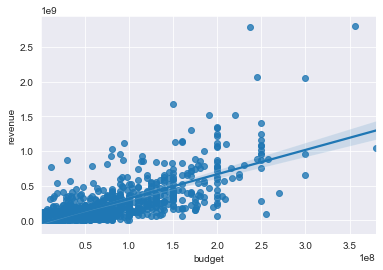

In [566]:
sns.regplot(x=df_dict['Action']['budget'], y=df_dict['Action']['revenue']);

In [6]:
df3 = pd.read_csv("data/discover.csv", engine='python')

In [33]:
df3.head(3)

,Unnamed: 0,popularity,vote_count,video,poster_path,id,adult,backdrop_path,original_language,original_title,genre_ids,title,vote_average,overview,release_date
0,0,306.289,7525.0,False,/tzYkC0vqX8Dokuwynhz1lnWWgWT.jpg,283366.0,False,/ld7V9BjMk2xtiBNcR8savyyk5ca.jpg,en,Miss Peregrine's Home for Peculiar Children,"[18, 14, 12, 10751]",Miss Peregrine's Home for Peculiar Children,6.7,A teenager finds himself transported to an isl...,2016-09-28
1,1,165.302,303.0,False,/4lwh4MX2yCogHflyAYMRbfdnpnm.jpg,420634.0,False,/fBNnj5bQ5YhzPUzxIW1UvLVZepP.jpg,en,Terrifier,"[53, 27]",Terrifier,6.3,A maniacal clown named Art terrorizes three yo...,2016-10-15
2,2,131.741,3734.0,False,/ubLbY97m8lYJ3Fykh7nfiwB5eth.jpg,316727.0,False,/craD86vySKvAkboyeXFnZwHrNA8.jpg,en,The Purge: Election Year,"[28, 27, 53]",The Purge: Election Year,6.4,Two years after choosing not to kill the man w...,2016-06-29


In [56]:
mov_ids = []
years = ['2018', '2019', '2020']
# df4 = df3[df3.release_date.str[:4]=='2017']

In [51]:
mov_ids = list(df4['id'])
# mov_ids.extend([x['id'] for x in content['results']])

In [57]:
for year in years:
    df4 = df3[df3.release_date.str[:4]==year]
    mov_ids = list(df4['id'])

    movs = []

    for id in tqdm(mov_ids):
        url = "https://api.themoviedb.org/3/movie/{}?api_key={}&language=en-US".format(id, api_key)
        resp = requests.get(url)
        content = resp.json()
        movs.append(content)
    
    df = pd.DataFrame(movs)
    df.to_csv('data/{}.csv'.format(year))

In [53]:
year = '2017'
df = pd.DataFrame(movs)
df.to_csv('data/{}.csv'.format(year))

In [58]:
df_16 = pd.read_csv("data/2016.csv")
df_17 = pd.read_csv("data/2017.csv")
df_18 = pd.read_csv("data/2018.csv")
df_19 = pd.read_csv("data/2019.csv")
df_20 = pd.read_csv("data/2020.csv")

In [66]:
df_20['release_date'].head()

0    2020-10-23
1    2020-10-16
2    2020-10-26
3    2020-10-01
4    2020-10-23
Name: release_date, dtype: object

In [70]:
df = pd.read_csv("data/five_year.csv")

## Scrape IMDB for Box Office Info

In [20]:
mov_df2.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'adult', 'backdrop_path',
       'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'success', 'status_code',
       'status_message'],
      dtype='object')

In [28]:
scr_df = mov_df2[(mov_df2.budget < 6000) | (mov_df2.revenue < 10000) & (mov_df2.imdb_id[:2] == "tt")]

In [152]:
imdb_ids = list(scr_df['imdb_id'])

In [160]:
len(imdb_ids)
imdb_ids1 = imdb_ids[:10000] + imdb_ids[20000:]
len(imdb_ids1)

36821

In [140]:
page = requests.get("https://www.imdb.com/title/tt0848228/")
soup = bs(page.content, "html.parser")

In [141]:
# title_details = soup.find('div', id = "titleDetails")
# txt_blocks = title_details.find_all('div', class_="txt-block")

In [56]:
txt_blocks = soup.select('div#titleDetails div.txt_block')

In [101]:
def grab_num(str):
    nums = [x for x in str if x.isdigit()]
    output = "".join(nums)
    if not nums:
        output = None
    return output

In [161]:
scr_budget = []
scr_revenue = []
count = 0
for db_id in tqdm(imdb_ids1):
    if type(db_id) != str:
        print("wrong id class ", db_id)
        continue
    if db_id[:2] != "tt":
        print("wrong id format ", db_id)
        continue
    
    url = "https://www.imdb.com/title/{}/".format(db_id)    
    page = requests.get(url)
    if page.status_code != 200: 
        print(page.status_code, db_id)
        continue
   
    soup = bs(page.content, "html.parser") 
    budget_div = soup.find('h4', text = "Budget:")
    try:
        bgt_text = budget_div.parent.get_text()
    except:
        print(db_id, " does not appear to have budget data...")
        continue
    try:
        budget = int(grab_num(bgt_text))
    except:
        print("scraped data not a number ", db_id)
        continue
    revenue_div = soup.find('h4', text= "Cumulative Worldwide Gross:")
    try:
        rev_text = revenue_div.parent.get_text()
    except:
        print(db_id, "does not appear to have revenue data...")
        continue
    try:
        revenue = int(grab_num(rev_text))
    except:
        print("scraped data not a number ", db_id)
        continue
    count +=1
    print(count)
    scr_budget.append((db_id, budget))
    scr_revenue.append((db_id, revenue))
    time.sleep(np.random.uniform(.4,1.3))


1
tt5647758  does not appear to have budget data...
tt4273562  does not appear to have budget data...
tt5323662  does not appear to have budget data...
tt3344680  does not appear to have budget data...
wrong id class  nan
tt6327570  does not appear to have budget data...
tt5251328  does not appear to have budget data...
tt6448970  does not appear to have budget data...
tt3289956  does not appear to have budget data...
tt6128602  does not appear to have budget data...
tt4959436 does not appear to have revenue data...
tt5595168  does not appear to have budget data...
tt5091548  does not appear to have budget data...
tt5492906  does not appear to have budget data...
tt5822648  does not appear to have budget data...
tt4790268 does not appear to have revenue data...
tt5084196  does not appear to have budget data...
2
tt5866090  does not appear to have budget data...
tt5259966  does not appear to have budget data...
tt3774802  does not appear to have budget data...
tt5271582  does not appear

tt6321108  does not appear to have budget data...
tt3330764  does not appear to have budget data...
tt4007248  does not appear to have budget data...
tt5029608  does not appear to have budget data...
tt1588878 does not appear to have revenue data...
tt5186714  does not appear to have budget data...
tt5752356  does not appear to have budget data...
tt1703957  does not appear to have budget data...
tt6104760  does not appear to have budget data...
tt5912454  does not appear to have budget data...
tt3894404  does not appear to have budget data...
tt5544700  does not appear to have budget data...
27
tt5168192  does not appear to have budget data...
tt5160154  does not appear to have budget data...
28
tt3991412  does not appear to have budget data...
tt5653444  does not appear to have budget data...
tt5921218  does not appear to have budget data...
tt3839880  does not appear to have budget data...
tt3174376  does not appear to have budget data...
tt5251438  does not appear to have budget da

tt4978274  does not appear to have budget data...
tt5572566  does not appear to have budget data...
tt5216534  does not appear to have budget data...
tt4526546  does not appear to have budget data...
tt6475250  does not appear to have budget data...
tt3701714  does not appear to have budget data...
tt4653586  does not appear to have budget data...
tt4156972  does not appear to have budget data...
tt5255524  does not appear to have budget data...
tt5931726  does not appear to have budget data...
tt5664684  does not appear to have budget data...
tt4228810  does not appear to have budget data...
tt3904278  does not appear to have budget data...
tt4518260  does not appear to have budget data...
tt3958780  does not appear to have budget data...
tt5828874  does not appear to have budget data...
tt5675936  does not appear to have budget data...
35
tt3652862  does not appear to have budget data...
tt5512872  does not appear to have budget data...
tt4335650  does not appear to have budget data.

tt3910814  does not appear to have budget data...
tt5673884  does not appear to have budget data...
tt2722504  does not appear to have budget data...
tt4035898  does not appear to have budget data...
tt4706888  does not appear to have budget data...
tt5860940  does not appear to have budget data...
tt5917230  does not appear to have budget data...
tt4835926 does not appear to have revenue data...
tt5594080  does not appear to have budget data...
tt4399590  does not appear to have budget data...
tt5673202  does not appear to have budget data...
tt3352034  does not appear to have budget data...
tt5220590  does not appear to have budget data...
tt5922484  does not appear to have budget data...
tt4538708  does not appear to have budget data...
tt6081882  does not appear to have budget data...
tt4262174  does not appear to have budget data...
tt4286666 does not appear to have revenue data...
tt4911408 does not appear to have revenue data...
tt5364518  does not appear to have budget data...


tt4515544  does not appear to have budget data...
tt4741714  does not appear to have budget data...
59
wrong id class  nan
tt3217994  does not appear to have budget data...
tt3653650  does not appear to have budget data...
tt2836628  does not appear to have budget data...
tt6269192  does not appear to have budget data...
tt5114984  does not appear to have budget data...
tt5574166  does not appear to have budget data...
60
tt4647784  does not appear to have budget data...
tt5247192  does not appear to have budget data...
tt4527254  does not appear to have budget data...
tt4680568  does not appear to have budget data...
tt4169250  does not appear to have budget data...
tt5957584  does not appear to have budget data...
tt3774866  does not appear to have budget data...
tt4632440  does not appear to have budget data...
tt1949605  does not appear to have budget data...
tt5666160  does not appear to have budget data...
tt4625516  does not appear to have budget data...
tt8599562  does not appe

tt2180317  does not appear to have budget data...
tt4061908 does not appear to have revenue data...
70
tt4908040  does not appear to have budget data...
tt3477620  does not appear to have budget data...
tt5369246  does not appear to have budget data...
tt5459456  does not appear to have budget data...
tt2081374  does not appear to have budget data...
tt5571230  does not appear to have budget data...
tt5538568  does not appear to have budget data...
tt4551314  does not appear to have budget data...
tt4010862  does not appear to have budget data...
tt3122390  does not appear to have budget data...
wrong id class  nan
tt2848324  does not appear to have budget data...
tt5281414  does not appear to have budget data...
tt5952626  does not appear to have budget data...
tt5814698 does not appear to have revenue data...
tt5947416  does not appear to have budget data...
tt4622108  does not appear to have budget data...
tt8620002  does not appear to have budget data...
tt4700190  does not appear 

tt1326264  does not appear to have budget data...
tt5069074  does not appear to have budget data...
tt5815946  does not appear to have budget data...
tt5827496  does not appear to have budget data...
tt2877192  does not appear to have budget data...
tt6082818  does not appear to have budget data...
tt5996202  does not appear to have budget data...
80
tt4024814  does not appear to have budget data...
tt4980812  does not appear to have budget data...
tt5598206  does not appear to have budget data...
tt4161564  does not appear to have budget data...
tt3520714  does not appear to have budget data...
tt3969208  does not appear to have budget data...
tt5707274  does not appear to have budget data...
tt5876352  does not appear to have budget data...
tt5769002  does not appear to have budget data...
tt6269700  does not appear to have budget data...
81
tt5735464  does not appear to have budget data...
tt5096628  does not appear to have budget data...
tt3991302 does not appear to have revenue da

tt5243424  does not appear to have budget data...
tt5333518  does not appear to have budget data...
tt5786588  does not appear to have budget data...
tt2076826  does not appear to have budget data...
tt3436572  does not appear to have budget data...
tt5713232  does not appear to have budget data...
tt5497458  does not appear to have budget data...
tt2806390  does not appear to have budget data...
tt5375714  does not appear to have budget data...
wrong id class  nan
tt4379800  does not appear to have budget data...
tt5709762  does not appear to have budget data...
tt5900592  does not appear to have budget data...
tt6170838 does not appear to have revenue data...
tt3254930  does not appear to have budget data...
tt5100628  does not appear to have budget data...
tt5465370  does not appear to have budget data...
tt3807496  does not appear to have budget data...
tt6210456 does not appear to have revenue data...
tt5265708  does not appear to have budget data...
tt4076934  does not appear to 

101
102
tt5087548  does not appear to have budget data...
tt4949162 does not appear to have revenue data...
wrong id class  nan
tt5563100  does not appear to have budget data...
tt4800418  does not appear to have budget data...
tt5684868  does not appear to have budget data...
tt2091476  does not appear to have budget data...
tt5538912  does not appear to have budget data...
tt2991368 does not appear to have revenue data...
tt5592256  does not appear to have budget data...
tt5802864  does not appear to have budget data...
tt1339660  does not appear to have budget data...
tt5460658  does not appear to have budget data...
tt3562966  does not appear to have budget data...
103
tt5163286  does not appear to have budget data...
tt1676739  does not appear to have budget data...
tt4404296  does not appear to have budget data...
tt3551450 does not appear to have revenue data...
tt6545160  does not appear to have budget data...
tt6176078  does not appear to have budget data...
tt5182856  does no

tt6325078  does not appear to have budget data...
tt6020236  does not appear to have budget data...
tt5325210  does not appear to have budget data...
tt5609004  does not appear to have budget data...
tt4694594  does not appear to have budget data...
tt5939924  does not appear to have budget data...
tt3758564  does not appear to have budget data...
tt3529098  does not appear to have budget data...
tt5840448  does not appear to have budget data...
tt6120500  does not appear to have budget data...
wrong id class  nan
tt5576334  does not appear to have budget data...
tt5695936  does not appear to have budget data...
tt5735410  does not appear to have budget data...
tt6132528  does not appear to have budget data...
tt5708154  does not appear to have budget data...
tt5472758  does not appear to have budget data...
108
tt5124082  does not appear to have budget data...
tt3157640 does not appear to have revenue data...
tt5300352  does not appear to have budget data...
tt3531260  does not appear

tt3846334  does not appear to have budget data...
tt4828304  does not appear to have budget data...
119
120
tt3597510  does not appear to have budget data...
tt7370564  does not appear to have budget data...
tt5135256  does not appear to have budget data...
tt3247286  does not appear to have budget data...
tt5743656  does not appear to have budget data...
tt2370138  does not appear to have budget data...
tt3750238  does not appear to have budget data...
wrong id class  nan
tt4373956  does not appear to have budget data...
121
122
tt4597598  does not appear to have budget data...
tt5729246  does not appear to have budget data...
tt5547654  does not appear to have budget data...
tt4976588  does not appear to have budget data...
tt6290024  does not appear to have budget data...
tt6974830  does not appear to have budget data...
wrong id class  nan
tt3109072  does not appear to have budget data...
tt5952526  does not appear to have budget data...
tt4438128  does not appear to have budget da

tt8210026  does not appear to have budget data...
tt5069136  does not appear to have budget data...
tt5335128  does not appear to have budget data...
tt5696188  does not appear to have budget data...
tt7197132  does not appear to have budget data...
tt5354458 does not appear to have revenue data...
tt5315110  does not appear to have budget data...
tt5843628  does not appear to have budget data...
tt5581268  does not appear to have budget data...
tt5487764  does not appear to have budget data...
tt4768926  does not appear to have budget data...
tt3954660  does not appear to have budget data...
tt4667682  does not appear to have budget data...
tt4801352 does not appear to have revenue data...
tt1439558  does not appear to have budget data...
tt5985288  does not appear to have budget data...
tt4875456  does not appear to have budget data...
tt6144522  does not appear to have budget data...
tt5585826  does not appear to have budget data...
tt6178628  does not appear to have budget data...


139
tt5341446  does not appear to have budget data...
tt2556676 does not appear to have revenue data...
tt5496244  does not appear to have budget data...
tt2055665 does not appear to have revenue data...
tt4915308 does not appear to have revenue data...
tt6135054  does not appear to have budget data...
tt5935392 does not appear to have revenue data...
tt6275674  does not appear to have budget data...
tt4010848  does not appear to have budget data...
wrong id class  nan
tt5774904  does not appear to have budget data...
140
tt3061100 does not appear to have revenue data...
tt3951298  does not appear to have budget data...
tt5869644 does not appear to have revenue data...
tt6114246  does not appear to have budget data...
tt6005368  does not appear to have budget data...
tt5597852  does not appear to have budget data...
tt5133128  does not appear to have budget data...
tt5642720  does not appear to have budget data...
tt3645178  does not appear to have budget data...
tt4782290  does not ap

tt5630396  does not appear to have budget data...
tt5194446  does not appear to have budget data...
146
tt5561598  does not appear to have budget data...
tt5716976  does not appear to have budget data...
tt6149804  does not appear to have budget data...
tt6232176  does not appear to have budget data...
tt3176414  does not appear to have budget data...
tt5312232  does not appear to have budget data...
tt5589756 does not appear to have revenue data...
tt5354160 does not appear to have revenue data...
tt6006696  does not appear to have budget data...
tt1563740  does not appear to have budget data...
tt6241352  does not appear to have budget data...
tt5804126  does not appear to have budget data...
tt5684820  does not appear to have budget data...
tt5436168  does not appear to have budget data...
tt3849370  does not appear to have budget data...
tt6460636  does not appear to have budget data...
tt5068090  does not appear to have budget data...
tt6156336  does not appear to have budget data

tt6376380 does not appear to have revenue data...
tt4048964 does not appear to have revenue data...
tt5687416  does not appear to have budget data...
tt4877264  does not appear to have budget data...
tt5337760  does not appear to have budget data...
tt3281960  does not appear to have budget data...
tt5706568  does not appear to have budget data...
tt4912452  does not appear to have budget data...
tt1977001  does not appear to have budget data...
tt5735176  does not appear to have budget data...
tt4400086  does not appear to have budget data...
155
tt4887028  does not appear to have budget data...
tt5625068 does not appear to have revenue data...
tt3403310  does not appear to have budget data...
tt5474132  does not appear to have budget data...
tt6111250  does not appear to have budget data...
tt6048582  does not appear to have budget data...
tt4545630  does not appear to have budget data...
tt6330048  does not appear to have budget data...
tt5460508  does not appear to have budget data

tt5535406  does not appear to have budget data...
tt4912182  does not appear to have budget data...
tt4943562  does not appear to have budget data...
tt5923678  does not appear to have budget data...
tt4145108 does not appear to have revenue data...
tt5859342  does not appear to have budget data...
163
tt4743564  does not appear to have budget data...
tt4780842  does not appear to have budget data...
164
tt4684268  does not appear to have budget data...
tt3912238  does not appear to have budget data...
tt3562532  does not appear to have budget data...
tt3721924  does not appear to have budget data...
tt4043502  does not appear to have budget data...
tt4185862  does not appear to have budget data...
tt6001452  does not appear to have budget data...
tt6001878  does not appear to have budget data...
tt6173644  does not appear to have budget data...
tt5327832  does not appear to have budget data...
tt5636430  does not appear to have budget data...
tt5930038  does not appear to have budget 

tt6359828  does not appear to have budget data...
tt3684870  does not appear to have budget data...
tt5475294  does not appear to have budget data...
tt4871018  does not appear to have budget data...
tt5492660  does not appear to have budget data...
tt3701460  does not appear to have budget data...
tt5596034  does not appear to have budget data...
tt3893826  does not appear to have budget data...
tt5479446  does not appear to have budget data...
tt5918074  does not appear to have budget data...
tt5748998  does not appear to have budget data...
tt5374830 does not appear to have revenue data...
177
tt5877060  does not appear to have budget data...
tt5753806  does not appear to have budget data...
tt6126196  does not appear to have budget data...
tt5347932  does not appear to have budget data...
tt5539376  does not appear to have budget data...
wrong id class  nan
tt5851030  does not appear to have budget data...
tt5263324  does not appear to have budget data...
tt5859338  does not appear

tt6090938  does not appear to have budget data...
tt5653604  does not appear to have budget data...
tt4480774  does not appear to have budget data...
tt7008774 does not appear to have revenue data...
tt5816076  does not appear to have budget data...
tt5833824 does not appear to have revenue data...
tt6215352  does not appear to have budget data...
wrong id class  nan
tt5943652  does not appear to have budget data...
tt6385806  does not appear to have budget data...
tt6410634  does not appear to have budget data...
tt6357624  does not appear to have budget data...
tt5751588  does not appear to have budget data...
tt4178850 does not appear to have revenue data...
wrong id class  nan
tt6209816  does not appear to have budget data...
tt5113136  does not appear to have budget data...
tt5214744  does not appear to have budget data...
tt5093990 does not appear to have revenue data...
tt5280626  does not appear to have budget data...
tt5215260 does not appear to have revenue data...
tt6254730 

tt5218486  does not appear to have budget data...
wrong id class  nan
tt9271580  does not appear to have budget data...
tt5104954  does not appear to have budget data...
tt5700962 does not appear to have revenue data...
tt6616286  does not appear to have budget data...
tt5070076  does not appear to have budget data...
tt2190451  does not appear to have budget data...
tt5772798  does not appear to have budget data...
194
tt5502412  does not appear to have budget data...
tt6153924  does not appear to have budget data...
tt5272094  does not appear to have budget data...
tt5123866  does not appear to have budget data...
tt4313608  does not appear to have budget data...
tt6975082  does not appear to have budget data...
tt4796634  does not appear to have budget data...
tt6129730  does not appear to have budget data...
tt2935662  does not appear to have budget data...
tt5470226  does not appear to have budget data...
tt4462166  does not appear to have budget data...
tt4568370  does not appear

tt5684728  does not appear to have budget data...
tt5822910  does not appear to have budget data...
tt5563192 does not appear to have revenue data...
tt4700248  does not appear to have budget data...
tt5974624  does not appear to have budget data...
tt5437148  does not appear to have budget data...
205
tt6126312  does not appear to have budget data...
tt5271120  does not appear to have budget data...
tt5780570 does not appear to have revenue data...
tt5347472  does not appear to have budget data...
tt5778204  does not appear to have budget data...
tt4734132  does not appear to have budget data...
wrong id class  nan
206
wrong id class  nan
tt5499864 does not appear to have revenue data...
tt5714582  does not appear to have budget data...
tt5323042  does not appear to have budget data...
tt4642936  does not appear to have budget data...
tt5307134  does not appear to have budget data...
wrong id class  nan
tt5701116 does not appear to have revenue data...
tt4845026  does not appear to ha

tt4610142  does not appear to have budget data...
tt6267964  does not appear to have budget data...
tt5065330 does not appear to have revenue data...
tt6289394  does not appear to have budget data...
tt6075688  does not appear to have budget data...
tt5579650  does not appear to have budget data...
tt6407628  does not appear to have budget data...
tt5973024 does not appear to have revenue data...
tt5569618  does not appear to have budget data...
wrong id class  nan
tt5608976  does not appear to have budget data...
wrong id class  nan
tt5541542  does not appear to have budget data...
tt5372350  does not appear to have budget data...
tt5518190 does not appear to have revenue data...
tt4569240  does not appear to have budget data...
tt6114234  does not appear to have budget data...
tt5842218  does not appear to have budget data...
tt5586178  does not appear to have budget data...
tt6244144 does not appear to have revenue data...
tt4779884  does not appear to have budget data...
tt5857818 

tt11452686  does not appear to have budget data...
wrong id class  nan
tt5928836  does not appear to have budget data...
tt5208176  does not appear to have budget data...
tt6974756  does not appear to have budget data...
tt5082418  does not appear to have budget data...
tt5044332  does not appear to have budget data...
tt4277264  does not appear to have budget data...
tt5941620 does not appear to have revenue data...
tt5260652 does not appear to have revenue data...
tt3922678  does not appear to have budget data...
tt6404984  does not appear to have budget data...
tt6018204  does not appear to have budget data...
wrong id class  nan
tt2814874 does not appear to have revenue data...
tt4490348  does not appear to have budget data...
wrong id class  nan
tt3179350  does not appear to have budget data...
tt5299464  does not appear to have budget data...
tt4002884  does not appear to have budget data...
tt4791844  does not appear to have budget data...
tt5022902  does not appear to have budg

tt3665704  does not appear to have budget data...
tt6130166  does not appear to have budget data...
219
tt4790416  does not appear to have budget data...
tt5131816  does not appear to have budget data...
tt6166990  does not appear to have budget data...
tt4717508  does not appear to have budget data...
tt5816130  does not appear to have budget data...
220
tt5805026  does not appear to have budget data...
tt6094228  does not appear to have budget data...
tt4440508  does not appear to have budget data...
tt6072662  does not appear to have budget data...
tt5851450  does not appear to have budget data...
tt5116314  does not appear to have budget data...
tt4412042  does not appear to have budget data...
tt5822856  does not appear to have budget data...
tt6135424  does not appear to have budget data...
wrong id class  nan
tt4016306  does not appear to have budget data...
tt4368038  does not appear to have budget data...
tt2918618  does not appear to have budget data...
wrong id class  nan
tt

tt6342502  does not appear to have budget data...
wrong id class  nan
tt5674554  does not appear to have budget data...
tt6522646  does not appear to have budget data...
tt6095626  does not appear to have budget data...
tt5135854  does not appear to have budget data...
tt5159024  does not appear to have budget data...
tt5706328 does not appear to have revenue data...
tt5231454  does not appear to have budget data...
wrong id class  nan
tt6069794 does not appear to have revenue data...
tt4867094 does not appear to have revenue data...
wrong id class  nan
wrong id class  nan
tt5643418  does not appear to have budget data...
tt6140144  does not appear to have budget data...
tt6497968  does not appear to have budget data...
wrong id class  nan
tt4612304  does not appear to have budget data...
tt3468612 does not appear to have revenue data...
tt5264056  does not appear to have budget data...
tt3687898 does not appear to have revenue data...
tt4291116  does not appear to have budget data...


tt6144930  does not appear to have budget data...
tt5479204 does not appear to have revenue data...
tt4119044  does not appear to have budget data...
tt4945466  does not appear to have budget data...
tt6475636  does not appear to have budget data...
tt5591540  does not appear to have budget data...
231
tt6358260  does not appear to have budget data...
tt5345020 does not appear to have revenue data...
tt6464368  does not appear to have budget data...
tt5821424  does not appear to have budget data...
tt5328352  does not appear to have budget data...
tt6054328  does not appear to have budget data...
tt6534622  does not appear to have budget data...
tt5243476  does not appear to have budget data...
tt5179130  does not appear to have budget data...
tt4642386  does not appear to have budget data...
tt6120548  does not appear to have budget data...
tt4412268  does not appear to have budget data...
tt6195494  does not appear to have budget data...
tt5425918  does not appear to have budget data

tt6259890  does not appear to have budget data...
tt5983406  does not appear to have budget data...
wrong id class  nan
tt5196158  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt4777738  does not appear to have budget data...
tt5963774  does not appear to have budget data...
tt5062710  does not appear to have budget data...
tt5649612  does not appear to have budget data...
tt5474592  does not appear to have budget data...
tt4594936  does not appear to have budget data...
tt4765918  does not appear to have budget data...
tt5635904  does not appear to have budget data...
tt5523544 does not appear to have revenue data...
tt5467740  does not appear to have budget data...
tt4208256  does not appear to have budget data...
tt3772660  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt6427912 does not appear to have revenue data...
tt5970252  does not appear to have budget data...
tt6372460  does not appear to have budget data...


tt7894420  does not appear to have budget data...
wrong id class  nan
tt4089498  does not appear to have budget data...
tt6102288  does not appear to have budget data...
tt4111826  does not appear to have budget data...
tt4764380  does not appear to have budget data...
tt6085362  does not appear to have budget data...
tt5333956 does not appear to have revenue data...
tt5773298  does not appear to have budget data...
tt6787084  does not appear to have budget data...
tt2349944 does not appear to have revenue data...
tt5635816  does not appear to have budget data...
wrong id class  nan
tt6840854  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt4657460  does not appear to have budget data...
tt5243448  does not appear to have budget data...
wrong id class  nan
tt3962380  does not appear to have budget data...
tt6264444  does not appear to have budget data...
tt6351892  does not appear to have budget data...
wrong id class  nan
tt4057708  does not appear to 

tt6218760  does not appear to have budget data...
tt4539140  does not appear to have budget data...
tt5224870  does not appear to have budget data...
tt4881208  does not appear to have budget data...
tt5116864  does not appear to have budget data...
tt7449594 does not appear to have revenue data...
tt4562262 does not appear to have revenue data...
tt6192248  does not appear to have budget data...
tt2259908 does not appear to have revenue data...
tt4903328  does not appear to have budget data...
tt5876318  does not appear to have budget data...
tt5048688  does not appear to have budget data...
tt6389080 does not appear to have revenue data...
tt6028412  does not appear to have budget data...
tt4626906  does not appear to have budget data...
tt10957128  does not appear to have budget data...
tt6223650  does not appear to have budget data...
tt6150988  does not appear to have budget data...
tt5820628  does not appear to have budget data...
tt5122092 does not appear to have revenue data...

tt4165838 does not appear to have revenue data...
tt5776736 does not appear to have revenue data...
tt3557978  does not appear to have budget data...
wrong id class  nan
tt5531694  does not appear to have budget data...
wrong id class  nan
tt6059600  does not appear to have budget data...
tt6118366  does not appear to have budget data...
tt7141672  does not appear to have budget data...
tt7826722  does not appear to have budget data...
tt3764648  does not appear to have budget data...
tt2818640  does not appear to have budget data...
wrong id class  nan
tt6001910  does not appear to have budget data...
tt2446990  does not appear to have budget data...
tt5831938  does not appear to have budget data...
tt4236480  does not appear to have budget data...
tt3580074  does not appear to have budget data...
tt5575342  does not appear to have budget data...
tt5001432  does not appear to have budget data...
tt5757520  does not appear to have budget data...
tt3906724  does not appear to have budge

tt5852292  does not appear to have budget data...
tt5937544  does not appear to have budget data...
tt5295330  does not appear to have budget data...
wrong id class  nan
tt5573130  does not appear to have budget data...
tt4675846  does not appear to have budget data...
tt5242898  does not appear to have budget data...
tt5203646 does not appear to have revenue data...
tt5651412  does not appear to have budget data...
tt6414688  does not appear to have budget data...
tt5525700  does not appear to have budget data...
tt6288394  does not appear to have budget data...
tt6126906 does not appear to have revenue data...
wrong id class  nan
tt7317404  does not appear to have budget data...
tt5024766  does not appear to have budget data...
tt6118732  does not appear to have budget data...
wrong id class  nan
tt5542208  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt6394744  does not appear to have budget data...
tt5934718  does not appear to have budget data...


tt4962566  does not appear to have budget data...
tt5526688  does not appear to have budget data...
tt5568146  does not appear to have budget data...
tt4625536  does not appear to have budget data...
tt4911656  does not appear to have budget data...
tt5809096  does not appear to have budget data...
tt4771160  does not appear to have budget data...
wrong id class  nan
tt3803120  does not appear to have budget data...
tt5553102  does not appear to have budget data...
tt6004854  does not appear to have budget data...
tt5332310  does not appear to have budget data...
tt4715290  does not appear to have budget data...
tt4917564  does not appear to have budget data...
tt5941178 does not appear to have revenue data...
wrong id class  nan
wrong id class  nan
tt6356338 does not appear to have revenue data...
tt7034918  does not appear to have budget data...
tt10270164 does not appear to have revenue data...
tt6389070  does not appear to have budget data...
tt5783250  does not appear to have budg

tt5539112 does not appear to have revenue data...
wrong id class  nan
tt6116824  does not appear to have budget data...
tt5863032  does not appear to have budget data...
wrong id class  nan
tt6046994  does not appear to have budget data...
tt7504160  does not appear to have budget data...
tt6072388  does not appear to have budget data...
wrong id class  nan
tt4313550  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt7658482 does not appear to have revenue data...
wrong id class  nan
wrong id class  nan
tt4531868 does not appear to have revenue data...
tt5811338  does not appear to have budget data...
tt3737012  does not appear to have budget data...
tt5969264  does not appear to have budget data...
tt4677852  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt4651660  does not appear to have budget data...
tt4713440  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt6343782  does not appear to 

tt5090508  does not appear to have budget data...
tt6051020  does not appear to have budget data...
tt4801080 does not appear to have revenue data...
tt6626098  does not appear to have budget data...
tt3969132  does not appear to have budget data...
tt5212090  does not appear to have budget data...
tt5110344  does not appear to have budget data...
wrong id class  nan
tt9553118 does not appear to have revenue data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt7493278  does not appear to have budget data...
wrong id class  nan
tt6866388  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt6378194  does not appear to have budget data...
tt6271528  does not appear to have budget data...
tt6271638  does not appear to have budget data...
wrong id class  nan
tt6286160 does not appear to have revenue data...
tt4249242  does not appear to have budget data...
wrong id class  nan
wrong id c

tt4664176  does not appear to have budget data...
tt5311780  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt5500826  does not appear to have budget data...
wrong id class  nan
tt6061578  does not appear to have budget data...
wrong id class  nan
tt5516864  does not appear to have budget data...
wrong id class  nan
tt5461478  does not appear to have budget data...
tt8092646  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt2335096  does not appear to have budget data...
wrong id class  nan
tt4434982 does not appear to have revenue data...
tt5840146  does not appear to have budget data...
tt5660300  does not appear to have budget data...
tt7842106  does not appear to have budget data...
tt7476386  does not appear to have budget data...
wrong id class  nan
tt5490306 does not appear to have revenue data...
tt5226582  does not appear to have budge

tt3566718  does not appear to have budget data...
tt6193572 does not appear to have revenue data...
tt6085176  does not appear to have budget data...
tt6423590  does not appear to have budget data...
tt3647434  does not appear to have budget data...
tt5917338  does not appear to have budget data...
wrong id class  nan
tt3064000  does not appear to have budget data...
tt7195602  does not appear to have budget data...
tt5529712  does not appear to have budget data...
tt6037818  does not appear to have budget data...
tt5011636 does not appear to have revenue data...
tt2516720  does not appear to have budget data...
tt5891890  does not appear to have budget data...
tt2624790  does not appear to have budget data...
tt7166196  does not appear to have budget data...
tt5474316 does not appear to have revenue data...
tt5669302  does not appear to have budget data...
tt7217588  does not appear to have budget data...
wrong id class  nan
tt6304902  does not appear to have budget data...
tt5495270 

tt10846384  does not appear to have budget data...
tt5535902  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt2385126 does not appear to have revenue data...
tt4829612  does not appear to have budget data...
tt6128292  does not appear to have budget data...
wrong id class  nan
tt5285704  does not appear to have budget data...
tt5340534  does not appear to have budget data...
tt5230498 does not appear to have revenue data...
tt2982158  does not appear to have budget data...
wrong id class  nan
tt6275372  does not appear to have budget data...
tt6066012  does not appear to have budget data...
tt8869484  does not appear to have budget data...
wrong id class  nan
tt6129126  does not appear to have budget data...
tt6158872  does not appear to have budget data...
tt6450044  does not appear to have budget data...
tt5891588  does not appear to have budget data...
269
wrong id class  nan
tt6081246  does not appear to have budget data...
tt4396602  does not appea

tt5425570 does not appear to have revenue data...
tt5539408  does not appear to have budget data...
tt4751686  does not appear to have budget data...
tt7224724  does not appear to have budget data...
tt5838338  does not appear to have budget data...
tt5639720  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt3886508  does not appear to have budget data...
tt11452204  does not appear to have budget data...
tt5834762  does not appear to have budget data...
tt6048828  does not appear to have budget data...
tt4470016  does not appear to have budget data...
tt5657322  does not appear to have budget data...
tt5975242  does not appear to have budget data...
wrong id class  nan
tt5605280  does not appear to have budget data...
tt5586330 does not appear to have revenue data...
tt6015262  does not appear to have budget data...
wrong id class  nan
tt6107570  does not appear to have budget data...
tt6314888  does not appear to have budget data...
270
tt6022568  does

tt0094859 does not appear to have revenue data...
tt6097002  does not appear to have budget data...
tt5512756  does not appear to have budget data...
tt5603256  does not appear to have budget data...
tt5478758  does not appear to have budget data...
tt1422356  does not appear to have budget data...
wrong id class  nan
tt5478654  does not appear to have budget data...
tt3879178 does not appear to have revenue data...
tt6151812  does not appear to have budget data...
wrong id class  nan
tt6268594  does not appear to have budget data...
tt4377980 does not appear to have revenue data...
wrong id class  nan
tt8188584  does not appear to have budget data...
tt5266858  does not appear to have budget data...
tt4278458 does not appear to have revenue data...
tt5626660 does not appear to have revenue data...
wrong id class  nan
wrong id class  nan
tt5892054  does not appear to have budget data...
tt2186886  does not appear to have budget data...
tt6123224  does not appear to have budget data...


tt6199748  does not appear to have budget data...
tt6057514  does not appear to have budget data...
wrong id class  nan
tt5440916  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt5537724 does not appear to have revenue data...
tt7120366  does not appear to have budget data...
tt5637418 does not appear to have revenue data...
wrong id class  nan
wrong id class  nan
tt5502346  does not appear to have budget data...
wrong id class  nan
tt5424964  does not appear to have budget data...
wrong id class  nan
tt4787136  does not appear to have budget data...
tt5494840  does not appear to have budget data...
tt5501264  does not appear to have budget data...
wrong id class  nan
tt4656396  does not appear to have budget data...
tt5291970 does not appear to have revenue data...
tt5160214 does not appear to have revenue data...
tt5475138  does not appear to have budget data...
tt5470266  does not appear to have budget data...
tt5356308  does not appear to have budge

tt5716168  does not appear to have budget data...
tt5936462  does not appear to have budget data...
wrong id class  nan
tt5957544 does not appear to have revenue data...
tt6728212  does not appear to have budget data...
tt4643142  does not appear to have budget data...
wrong id class  nan
tt6025626  does not appear to have budget data...
wrong id class  nan
tt4419506  does not appear to have budget data...
wrong id class  nan
tt4536608  does not appear to have budget data...
277
tt5536056  does not appear to have budget data...
wrong id class  nan
tt5865148  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt4865186  does not appear to have budget data...
tt6259364  does not appear to have budget data...
tt5396672  does not appear to have budget data...
wrong id class  nan
tt4188654  does not appear to have budget data...
tt4593390  does not appear to have budget data...
wrong id class  nan
tt5317382  does not appear to have budget data...
tt5863360  does 

tt5752508  does not appear to have budget data...
tt5512842  does not appear to have budget data...
tt6499412  does not appear to have budget data...
tt5360968 does not appear to have revenue data...
tt3863420 does not appear to have revenue data...
tt5466850  does not appear to have budget data...
tt4729360 does not appear to have revenue data...
tt5280430 does not appear to have revenue data...
wrong id class  nan
tt3638722  does not appear to have budget data...
tt5695842 does not appear to have revenue data...
wrong id class  nan
wrong id class  nan
tt6292874  does not appear to have budget data...
tt5521666  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt3505458  does not appear to have budget data...
tt5206558  does not appear to have budget data...
wrong id class  nan
tt6253688 does not appear to have revenue data...
tt8835568  does not appear to have budget data...
tt4876812  does not appear to have budget data...
tt5831924  does not appear to 

tt6441114  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt5788116  does not appear to have budget data...
wrong id class  nan
tt6338958  does not appear to have budget data...
tt4675324  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt9209768  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt6079698  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt7117454 does not appear to have revenue data...
tt6097896  does not appear to have budget data...
wrong id class  nan
tt6120824  does not appear to have budget data...
tt7077792 does not appear to have revenue data...
tt6504300 does not appear to have revenue data...
tt6091000  does not appear to have budget data...
tt6223852  does not appear to have budget data...
tt6560664  does not appear to have budget data...
tt5624426  does not 

tt6415674 does not appear to have revenue data...
tt3909186  does not appear to have budget data...
tt5160192 does not appear to have revenue data...
wrong id class  nan
tt11816896 does not appear to have revenue data...
tt11820110 does not appear to have revenue data...
tt11822012 does not appear to have revenue data...
wrong id class  nan
tt6046552 does not appear to have revenue data...
wrong id class  nan
wrong id class  nan
tt5933970  does not appear to have budget data...
wrong id class  nan
tt5489164  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt6454562  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt8668158 does not appear to have revenue data...
tt6364390  does not appear to have budget data...
tt6100724  does not appear to have budget data...
wrong id class  nan
tt13352876  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt5361862 does not appear to have revenue data...
wrong 

tt7588532  does not appear to have budget data...
tt6435666 does not appear to have revenue data...
wrong id class  nan
tt5848156 does not appear to have revenue data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt12392178 does not appear to have revenue data...
wrong id class  nan
wrong id class  nan
tt5644756 does not appear to have revenue data...
wrong id class  nan
wrong id class  nan
tt4185848  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt9733916 does not appear to have revenue data...
wrong id class  nan
tt5769560  does not appear to have budget data...
wrong id class  nan
tt7124952  does not appear to have budget data...
wrong id class  nan
tt6186466 does not appear to have revenue data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt6398174 does not appear to have revenue data...
wrong id 

tt7297848  does not appear to have budget data...
tt7297804  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt4212008  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt5936554  does not appear to have budget data...
tt6795280  does not appear to have budget data...
wrong id class  nan
tt5588618  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt7297560  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id c

tt6067292  does not appear to have budget data...
wrong id class  nan
tt6237328  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt5831130  does not appear to have budget data...
wrong id class  nan
tt3508238 does not appear to have revenue data...
tt3700688  does not appear to have budget data...
tt6373528  does not appear to have budget data...
wrong id class  nan
tt6229056  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt5899958  does not appear to have budget data...
tt5317566  does not appear to have budget data...
tt5328412  does not appear to have budget data...
tt6367580 does not appear to have revenue data...
tt5494852  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt6260974  does not 

tt12209598  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt10071248  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt3117980  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt8541408  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt5876934  does not appear to have budget data...
wrong id class  nan
tt5861794  does not appear to have budget data...
wrong id class  nan
tt5752752  does not appear to have budget data...
wrong id class  nan
tt6433008  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt6314300  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt5777630 does not appear to have revenue data...
wrong id class  nan
wrong id class  nan
tt7281206  does not appear to have bud

tt5804296 does not appear to have revenue data...
tt4294970  does not appear to have budget data...
tt6988208  does not appear to have budget data...
tt6548966  does not appear to have budget data...
tt5815944  does not appear to have budget data...
tt5452780  does not appear to have budget data...
tt6317962  does not appear to have budget data...
tt7283066  does not appear to have budget data...
tt5544384  does not appear to have budget data...
tt5776208  does not appear to have budget data...
tt6237208  does not appear to have budget data...
tt1536537  does not appear to have budget data...
tt5914996  does not appear to have budget data...
tt5084198  does not appear to have budget data...
tt6645614  does not appear to have budget data...
tt6580380  does not appear to have budget data...
tt3280262  does not appear to have budget data...
tt6470762  does not appear to have budget data...
tt6728390  does not appear to have budget data...
tt5628418  does not appear to have budget data...


tt4411596  does not appear to have budget data...
tt5493706  does not appear to have budget data...
tt7074092  does not appear to have budget data...
tt6479178 does not appear to have revenue data...
tt4721124  does not appear to have budget data...
tt5159414  does not appear to have budget data...
tt7130740  does not appear to have budget data...
tt5119116  does not appear to have budget data...
tt5451690  does not appear to have budget data...
tt4348012  does not appear to have budget data...
tt3859272  does not appear to have budget data...
301
tt5503688  does not appear to have budget data...
tt7608418  does not appear to have budget data...
tt2331047  does not appear to have budget data...
tt5851014 does not appear to have revenue data...
tt5175450  does not appear to have budget data...
tt6204340  does not appear to have budget data...
tt5167966  does not appear to have budget data...
tt4998772  does not appear to have budget data...
302
tt7136312  does not appear to have budget 

318
tt5420886  does not appear to have budget data...
tt5348190  does not appear to have budget data...
tt6086080  does not appear to have budget data...
tt7418206  does not appear to have budget data...
tt7518466  does not appear to have budget data...
tt0331314  does not appear to have budget data...
tt5717492  does not appear to have budget data...
tt4898730  does not appear to have budget data...
tt7588790  does not appear to have budget data...
319
tt4351548  does not appear to have budget data...
tt5564148  does not appear to have budget data...
tt3722062  does not appear to have budget data...
tt3335606  does not appear to have budget data...
tt5617898  does not appear to have budget data...
tt3780500  does not appear to have budget data...
tt6791000  does not appear to have budget data...
tt5830200  does not appear to have budget data...
tt6874406  does not appear to have budget data...
tt5126922  does not appear to have budget data...
tt6604064  does not appear to have budget 

339
tt7131334  does not appear to have budget data...
tt3758852  does not appear to have budget data...
tt3762912  does not appear to have budget data...
tt5988966  does not appear to have budget data...
tt5598172  does not appear to have budget data...
tt6293032  does not appear to have budget data...
tt3268340  does not appear to have budget data...
tt4283892  does not appear to have budget data...
tt3343868  does not appear to have budget data...
tt5091530  does not appear to have budget data...
tt7588798  does not appear to have budget data...
tt3592904  does not appear to have budget data...
tt5752606  does not appear to have budget data...
340
tt6809496  does not appear to have budget data...
tt2967226 does not appear to have revenue data...
tt6263642  does not appear to have budget data...
tt4843344  does not appear to have budget data...
tt4185566  does not appear to have budget data...
tt7056864  does not appear to have budget data...
tt5690142  does not appear to have budget 

tt6543048  does not appear to have budget data...
tt4144332  does not appear to have budget data...
tt2337841  does not appear to have budget data...
tt3715296  does not appear to have budget data...
tt6506146  does not appear to have budget data...
tt4720596  does not appear to have budget data...
tt5966990  does not appear to have budget data...
tt6184894  does not appear to have budget data...
tt4435082  does not appear to have budget data...
tt6684810  does not appear to have budget data...
tt1024855  does not appear to have budget data...
tt5468018  does not appear to have budget data...
tt6495526  does not appear to have budget data...
tt6516590  does not appear to have budget data...
tt7030432  does not appear to have budget data...
tt5746178  does not appear to have budget data...
tt5239942  does not appear to have budget data...
tt6267732  does not appear to have budget data...
tt7654082  does not appear to have budget data...
tt5663298  does not appear to have budget data...


tt6212136  does not appear to have budget data...
tt6917272  does not appear to have budget data...
tt6921496  does not appear to have budget data...
tt3310896  does not appear to have budget data...
tt5959980  does not appear to have budget data...
tt8190902  does not appear to have budget data...
tt8515750  does not appear to have budget data...
tt6887540  does not appear to have budget data...
tt8558596  does not appear to have budget data...
tt9103602 does not appear to have revenue data...
tt9588298  does not appear to have budget data...
tt2838568  does not appear to have budget data...
tt8555248  does not appear to have budget data...
tt4524418  does not appear to have budget data...
tt7586752  does not appear to have budget data...
tt9154936 does not appear to have revenue data...
tt7689960  does not appear to have budget data...
wrong id class  nan
tt7610858  does not appear to have budget data...
tt8499212  does not appear to have budget data...
wrong id class  nan
tt6064520 

359
360
tt3823392  does not appear to have budget data...
tt8115282  does not appear to have budget data...
tt8276562  does not appear to have budget data...
tt7994070  does not appear to have budget data...
tt7891470  does not appear to have budget data...
wrong id class  nan
tt8128866  does not appear to have budget data...
tt4729642  does not appear to have budget data...
tt4738912  does not appear to have budget data...
tt6095486  does not appear to have budget data...
wrong id class  nan
tt5755280  does not appear to have budget data...
tt5942864  does not appear to have budget data...
tt7759626  does not appear to have budget data...
tt4768586  does not appear to have budget data...
tt8452572  does not appear to have budget data...
tt3555514  does not appear to have budget data...
tt6628386 does not appear to have revenue data...
tt1362141 does not appear to have revenue data...
tt5583554  does not appear to have budget data...
tt7946586  does not appear to have budget data...
tt

tt5132392  does not appear to have budget data...
tt3329456  does not appear to have budget data...
tt9189572  does not appear to have budget data...
tt9015302  does not appear to have budget data...
wrong id class  nan
tt3180548  does not appear to have budget data...
tt5686622  does not appear to have budget data...
tt7477820 does not appear to have revenue data...
wrong id class  nan
wrong id class  nan
tt10022158 does not appear to have revenue data...
tt7356382  does not appear to have budget data...
tt6297258  does not appear to have budget data...
tt5216022  does not appear to have budget data...
tt8236398  does not appear to have budget data...
tt8951960 does not appear to have revenue data...
tt5748106  does not appear to have budget data...
tt5779286  does not appear to have budget data...
tt7823036  does not appear to have budget data...
tt6110984  does not appear to have budget data...
tt3424722  does not appear to have budget data...
tt7975674  does not appear to have budg

tt7583418  does not appear to have budget data...
tt9678928  does not appear to have budget data...
tt7500618 does not appear to have revenue data...
tt8727992 does not appear to have revenue data...
tt3786198  does not appear to have budget data...
tt6998408  does not appear to have budget data...
wrong id class  nan
tt6250554  does not appear to have budget data...
tt4263780  does not appear to have budget data...
tt9058944  does not appear to have budget data...
tt6651118  does not appear to have budget data...
tt7343732  does not appear to have budget data...
tt6504868  does not appear to have budget data...
tt0771639  does not appear to have budget data...
tt7114588 does not appear to have revenue data...
tt7408776  does not appear to have budget data...
wrong id class  nan
tt6109124  does not appear to have budget data...
tt9369332  does not appear to have budget data...
tt7842288 does not appear to have revenue data...
tt3509978  does not appear to have budget data...
tt6102396 

tt5737162  does not appear to have budget data...
tt7993666  does not appear to have budget data...
tt7142506  does not appear to have budget data...
tt9452652  does not appear to have budget data...
tt6670584  does not appear to have budget data...
tt8904630 does not appear to have revenue data...
tt8517704  does not appear to have budget data...
tt8956390  does not appear to have budget data...
tt8490838  does not appear to have budget data...
378
tt8531560  does not appear to have budget data...
tt6185686  does not appear to have budget data...
tt7049420  does not appear to have budget data...
tt6984230  does not appear to have budget data...
tt9033636  does not appear to have budget data...
tt7704710  does not appear to have budget data...
tt6131208  does not appear to have budget data...
wrong id class  nan
tt6802918  does not appear to have budget data...
tt6171964 does not appear to have revenue data...
tt4229864  does not appear to have budget data...
tt9134798  does not appear

tt6135920  does not appear to have budget data...
387
tt6236762  does not appear to have budget data...
tt7527626  does not appear to have budget data...
tt5480520  does not appear to have budget data...
tt8159764 does not appear to have revenue data...
tt7542928  does not appear to have budget data...
tt8467658  does not appear to have budget data...
tt6194704  does not appear to have budget data...
tt2928904 does not appear to have revenue data...
tt6877562  does not appear to have budget data...
tt8924518 does not appear to have revenue data...
tt3745558  does not appear to have budget data...
tt9846154  does not appear to have budget data...
tt7298796  does not appear to have budget data...
tt7776430  does not appear to have budget data...
tt6821206 does not appear to have revenue data...
tt3197802  does not appear to have budget data...
tt4192066  does not appear to have budget data...
tt5781146  does not appear to have budget data...
tt9440874  does not appear to have budget data

tt8850510  does not appear to have budget data...
tt8592222  does not appear to have budget data...
tt5610950  does not appear to have budget data...
tt6353976  does not appear to have budget data...
tt7751192  does not appear to have budget data...
tt5270688  does not appear to have budget data...
tt6159520  does not appear to have budget data...
tt7365166  does not appear to have budget data...
tt5737840  does not appear to have budget data...
tt7543904  does not appear to have budget data...
tt7458872  does not appear to have budget data...
tt7587878  does not appear to have budget data...
tt4209174  does not appear to have budget data...
tt8458202  does not appear to have budget data...
tt8209760  does not appear to have budget data...
tt8425830  does not appear to have budget data...
tt7583152  does not appear to have budget data...
tt7125510  does not appear to have budget data...
tt5859038  does not appear to have budget data...
tt7769310  does not appear to have budget data...


tt8503508  does not appear to have budget data...
tt4381382  does not appear to have budget data...
tt8059382  does not appear to have budget data...
tt8612792  does not appear to have budget data...
tt4569374  does not appear to have budget data...
tt7125498  does not appear to have budget data...
tt6984534  does not appear to have budget data...
tt6136188  does not appear to have budget data...
tt8561086  does not appear to have budget data...
tt7268778  does not appear to have budget data...
tt5776928  does not appear to have budget data...
tt9426482 does not appear to have revenue data...
tt8836382  does not appear to have budget data...
tt7231194  does not appear to have budget data...
tt6384386  does not appear to have budget data...
tt6746304  does not appear to have budget data...
tt4841716  does not appear to have budget data...
tt7525942  does not appear to have budget data...
tt8076266  does not appear to have budget data...
tt9902900  does not appear to have budget data...


tt8748256  does not appear to have budget data...
tt4347994 does not appear to have revenue data...
tt9219848  does not appear to have budget data...
tt7761590 does not appear to have revenue data...
tt8714584  does not appear to have budget data...
wrong id class  nan
tt8648126  does not appear to have budget data...
tt9336816  does not appear to have budget data...
tt7155178  does not appear to have budget data...
tt8595622  does not appear to have budget data...
403
wrong id class  nan
wrong id class  nan
tt8211922  does not appear to have budget data...
tt8449092  does not appear to have budget data...
tt10373148  does not appear to have budget data...
404
wrong id class  nan
tt6557704  does not appear to have budget data...
tt9143580  does not appear to have budget data...
tt7180776  does not appear to have budget data...
tt8497794  does not appear to have budget data...
tt7945822  does not appear to have budget data...
tt8733898  does not appear to have budget data...
tt8703882  

tt6100122  does not appear to have budget data...
wrong id class  nan
tt7619554  does not appear to have budget data...
tt4883336  does not appear to have budget data...
tt7704392  does not appear to have budget data...
tt8463722  does not appear to have budget data...
tt7852918  does not appear to have budget data...
tt6650364  does not appear to have budget data...
407
tt8245604  does not appear to have budget data...
tt3454104  does not appear to have budget data...
tt5974066  does not appear to have budget data...
tt7854174  does not appear to have budget data...
tt2221755  does not appear to have budget data...
tt8898498 does not appear to have revenue data...
tt7245898  does not appear to have budget data...
tt8215338  does not appear to have budget data...
tt9169974  does not appear to have budget data...
tt8985618  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt7795376  does not appear to have budget data...
tt9036926  does not appear to have b

tt5539474  does not appear to have budget data...
tt8893608  does not appear to have budget data...
tt6936350  does not appear to have budget data...
tt6872436  does not appear to have budget data...
tt7620746  does not appear to have budget data...
tt4795624 does not appear to have revenue data...
tt5813010  does not appear to have budget data...
wrong id class  nan
tt5295774  does not appear to have budget data...
tt8499702  does not appear to have budget data...
tt6737518  does not appear to have budget data...
tt5993468  does not appear to have budget data...
wrong id class  nan
tt7808118 does not appear to have revenue data...
tt7217362 does not appear to have revenue data...
wrong id class  nan
tt6146812  does not appear to have budget data...
tt8037350  does not appear to have budget data...
wrong id class  nan
tt5176648  does not appear to have budget data...
tt5645932  does not appear to have budget data...
tt7794052  does not appear to have budget data...
tt8618712  does not 

tt6514196  does not appear to have budget data...
tt5860356  does not appear to have budget data...
tt7909444  does not appear to have budget data...
tt7304212  does not appear to have budget data...
wrong id class  nan
tt7745080  does not appear to have budget data...
tt5705306  does not appear to have budget data...
tt6951594 does not appear to have revenue data...
423
tt7819506  does not appear to have budget data...
tt6322522  does not appear to have budget data...
tt8512642  does not appear to have budget data...
tt8234866  does not appear to have budget data...
424
tt10289196  does not appear to have budget data...
tt7639502  does not appear to have budget data...
tt6251216  does not appear to have budget data...
425
tt7707988  does not appear to have budget data...
tt8560130  does not appear to have budget data...
wrong id class  nan
tt8487226  does not appear to have budget data...
tt7958614  does not appear to have budget data...
tt6975606  does not appear to have budget data.

tt9104810  does not appear to have budget data...
tt9327424  does not appear to have budget data...
wrong id class  nan
tt4667872  does not appear to have budget data...
tt6992258  does not appear to have budget data...
tt7059506  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt6774588  does not appear to have budget data...
tt9139792  does not appear to have budget data...
tt9280844  does not appear to have budget data...
tt8507314  does not appear to have budget data...
tt6724880  does not appear to have budget data...
tt8875366  does not appear to have budget data...
tt7478112  does not appear to have budget data...
wrong id class  nan
tt7385782  does not appear to have budget data...
tt9154192  does not appear to have budget data...
tt6816210  does not appear to have budget data...
tt6263828  does not appear to have budget data...
wrong id class  nan
tt9085726  does not appear to have budget data...
tt9404440  does not appear to have budget data...


tt8697666  does not appear to have budget data...
tt11190254  does not appear to have budget data...
tt4714236 does not appear to have revenue data...
tt10324286  does not appear to have budget data...
tt9100532  does not appear to have budget data...
tt8495724  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt8736994  does not appear to have budget data...
tt9804432  does not appear to have budget data...
wrong id class  nan
tt8282116 does not appear to have revenue data...
tt7379662  does not appear to have budget data...
tt1703123  does not appear to have budget data...
tt5242034 does not appear to have revenue data...
tt10442498  does not appear to have budget data...
tt7620608  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt8126544  does not appear to have budget data...
tt6757606  does not appear to have budget data...
tt8684648  does not appear to have budget data...
tt10719944  does not appear to have budget data

tt6319346  does not appear to have budget data...
wrong id class  nan
tt8007250  does not appear to have budget data...
tt7674502  does not appear to have budget data...
wrong id class  nan
tt8972568  does not appear to have budget data...
tt8051280  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt7341988  does not appear to have budget data...
tt6096192  does not appear to have budget data...
tt8185094  does not appear to have budget data...
438
wrong id class  nan
tt6214294  does not appear to have budget data...
tt3761426  does not appear to have budget data...
tt9014996  does not appear to have budget data...
tt8106588  does not appear to have budget data...
tt7747264  does not appear to have budget data...
wrong id class  nan
tt6208950  does not appear to have budget data...
tt7580994  does not appear to have budget data...
tt2509730  does not appear to have budget data...
tt7138120  does not appear to have budget data...
wrong id class  nan
tt7331

tt6442326  does not appear to have budget data...
tt9170528  does not appear to have budget data...
tt1723128  does not appear to have budget data...
tt8875308  does not appear to have budget data...
tt8308496  does not appear to have budget data...
tt8661074  does not appear to have budget data...
tt7727478  does not appear to have budget data...
wrong id class  nan
tt7131704  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt8461794  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt7545122  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt8760622 does not appear to have revenue data...
tt10515182  does not appear to have budget data...
tt8375882 does not appear to have revenue data...
wrong id class  nan
tt8163286  does not appear to have budget data...
tt10109836  does not appear to have budget data...
tt704067

tt9116094  does not appear to have budget data...
tt7150482  does not appear to have budget data...
tt9411324  does not appear to have budget data...
tt7415698  does not appear to have budget data...
tt8019632  does not appear to have budget data...
tt5356318  does not appear to have budget data...
tt8575408  does not appear to have budget data...
tt7825894  does not appear to have budget data...
tt9149982  does not appear to have budget data...
tt7442044  does not appear to have budget data...
tt6814106  does not appear to have budget data...
tt8186676  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt7884738  does not appear to have budget data...
tt9625288  does not appear to have budget data...
tt9174800  does not appear to have budget data...
wrong id class  nan
tt6277760  does not appear to have budget data...
wrong id class  nan
tt8562000  does not appear to have budget data...
tt9520276  does not appear to have budget data...
wrong id class  nan


tt8634576  does not appear to have budget data...
wrong id class  nan
tt5613786 does not appear to have revenue data...
wrong id class  nan
tt9112578  does not appear to have budget data...
tt6563862  does not appear to have budget data...
wrong id class  nan
tt10134744  does not appear to have budget data...
tt7641782  does not appear to have budget data...
tt7581116  does not appear to have budget data...
tt8259148  does not appear to have budget data...
wrong id class  nan
tt9025104 does not appear to have revenue data...
tt8299800  does not appear to have budget data...
tt7285642  does not appear to have budget data...
tt7146386  does not appear to have budget data...
tt5268028  does not appear to have budget data...
tt6797218  does not appear to have budget data...
tt9824674  does not appear to have budget data...
tt7919426  does not appear to have budget data...
tt6330414  does not appear to have budget data...
tt8105964  does not appear to have budget data...
tt8737640  does not

tt7740160  does not appear to have budget data...
tt7281172  does not appear to have budget data...
wrong id class  nan
tt8862524  does not appear to have budget data...
tt6594070 does not appear to have revenue data...
tt8027632  does not appear to have budget data...
tt3638444  does not appear to have budget data...
tt9448284  does not appear to have budget data...
tt7005164  does not appear to have budget data...
tt8655740  does not appear to have budget data...
wrong id class  nan
tt6390294 does not appear to have revenue data...
wrong id class  nan
tt7754486  does not appear to have budget data...
wrong id class  nan
tt8474122  does not appear to have budget data...
tt8851036  does not appear to have budget data...
tt6565604  does not appear to have budget data...
wrong id class  nan
tt9146462  does not appear to have budget data...
wrong id class  nan
tt8190424  does not appear to have budget data...
wrong id class  nan
tt6834466  does not appear to have budget data...
tt8175968 

tt6037866 does not appear to have revenue data...
tt8003846 does not appear to have revenue data...
tt8137372  does not appear to have budget data...
tt8170456 does not appear to have revenue data...
tt8389532  does not appear to have budget data...
tt9051916 does not appear to have revenue data...
tt7583794  does not appear to have budget data...
tt8269202  does not appear to have budget data...
tt7579490 does not appear to have revenue data...
tt5791338 does not appear to have revenue data...
wrong id class  nan
tt8081442  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt5428666  does not appear to have budget data...
wrong id class  nan
tt7976486  does not appear to have budget data...
tt7404062  does not appear to have budget data...
wrong id class  nan
tt7624996  does not appear to have budget data...
tt7879986  does not appear to have budget data...
wrong id class  nan
tt8199024  does not appear to have budget data...
wrong id class  nan
wrong id c

tt7772412 does not appear to have revenue data...
wrong id class  nan
tt9072928  does not appear to have budget data...
tt8890230  does not appear to have budget data...
tt10249374  does not appear to have budget data...
wrong id class  nan
tt8844480 does not appear to have revenue data...
tt9265528 does not appear to have revenue data...
tt8458712  does not appear to have budget data...
tt5152882  does not appear to have budget data...
tt9159816  does not appear to have budget data...
tt3425408 does not appear to have revenue data...
tt4659710  does not appear to have budget data...
tt8320394  does not appear to have budget data...
wrong id class  nan
tt8069048  does not appear to have budget data...
wrong id class  nan
tt7942696  does not appear to have budget data...
tt5625098  does not appear to have budget data...
tt8084510  does not appear to have budget data...
tt7913020  does not appear to have budget data...
tt8488892  does not appear to have budget data...
tt7767874  does not

tt6058084  does not appear to have budget data...
tt9079952  does not appear to have budget data...
tt7695014  does not appear to have budget data...
tt8563706  does not appear to have budget data...
tt5943466  does not appear to have budget data...
tt3346462  does not appear to have budget data...
tt8125572  does not appear to have budget data...
tt7271858  does not appear to have budget data...
tt7215548  does not appear to have budget data...
tt9164850  does not appear to have budget data...
tt4310688  does not appear to have budget data...
462
wrong id class  nan
wrong id class  nan
tt6210054 does not appear to have revenue data...
tt8890540  does not appear to have budget data...
tt8425264 does not appear to have revenue data...
tt8839138  does not appear to have budget data...
tt8159562  does not appear to have budget data...
tt6481232  does not appear to have budget data...
tt5711454  does not appear to have budget data...
tt8041244  does not appear to have budget data...
wrong 

tt9026136  does not appear to have budget data...
tt8954044  does not appear to have budget data...
470
tt7906392  does not appear to have budget data...
tt5695316  does not appear to have budget data...
tt7998260  does not appear to have budget data...
tt7326824  does not appear to have budget data...
wrong id class  nan
tt4590434  does not appear to have budget data...
471
wrong id class  nan
tt8829500  does not appear to have budget data...
tt8610760  does not appear to have budget data...
tt6682424 does not appear to have revenue data...
tt7385820  does not appear to have budget data...
tt7987516 does not appear to have revenue data...
wrong id class  nan
tt7541970  does not appear to have budget data...
tt5844772 does not appear to have revenue data...
tt7897468  does not appear to have budget data...
tt6242154  does not appear to have budget data...
tt7791048  does not appear to have budget data...
tt4945640  does not appear to have budget data...
tt7901824  does not appear to ha

tt9204072  does not appear to have budget data...
tt6361212  does not appear to have budget data...
tt8857610  does not appear to have budget data...
wrong id class  nan
tt7737398  does not appear to have budget data...
wrong id class  nan
tt7757844  does not appear to have budget data...
tt7035266  does not appear to have budget data...
wrong id class  nan
tt9516782  does not appear to have budget data...
tt8990566  does not appear to have budget data...
wrong id class  nan
tt8838574 does not appear to have revenue data...
tt4495830 does not appear to have revenue data...
tt8952644  does not appear to have budget data...
tt8561698  does not appear to have budget data...
tt8924044  does not appear to have budget data...
tt8094072  does not appear to have budget data...
wrong id class  nan
tt8987600  does not appear to have budget data...
tt7765424 does not appear to have revenue data...
tt9059896 does not appear to have revenue data...
tt8525846 does not appear to have revenue data...


tt9198440  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt8312704  does not appear to have budget data...
tt9207658 does not appear to have revenue data...
wrong id class  nan
tt10160686  does not appear to have budget data...
wrong id class  nan
tt9373902 does not appear to have revenue data...
wrong id class  nan
tt5729830  does not appear to have budget data...
wrong id class  nan
tt8065816  does not appear to have budget data...
tt8394558  does not appear to have budget data...
tt4011544  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt6249636  does not appear to have budget data...
tt8638638  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt8616016  does not appear to have budget data...
tt8690938  does not appear to have budget data...
tt5315902 does not appear to have revenue data...
tt8873246  does not appear to have budget data...
wrong id class  nan
tt8193892  does not appear to

tt7838380 does not appear to have revenue data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt8396242  does not appear to have budget data...
wrong id class  nan
tt8278748 does not appear to have revenue data...
wrong id class  nan
tt7688186  does not appear to have budget data...
tt7614030 does not appear to have revenue data...
wrong id class  nan
wrong id class  nan
tt8006664  does not appear to have budget data...
wrong id class  nan
tt7886978  does not appear to have budget data...
tt3565066  does not appear to have budget data...
tt7161372  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt7968170 does not appear to have revenue data...
tt6947462  does not appear to have budget data...
tt7112496  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt7847284  does not appear to have budget data...
wrong id class  nan
tt9640562  does not appear to have budget data...


tt7307156  does not appear to have budget data...
tt8585610  does not appear to have budget data...
tt8561540  does not appear to have budget data...
tt7924564 does not appear to have revenue data...
wrong id class  nan
wrong id class  nan
tt7384954  does not appear to have budget data...
tt7733718  does not appear to have budget data...
tt8526290  does not appear to have budget data...
tt7851080 does not appear to have revenue data...
tt7733358  does not appear to have budget data...
tt7818416  does not appear to have budget data...
tt3889626  does not appear to have budget data...
tt8080960  does not appear to have budget data...
tt5983438  does not appear to have budget data...
tt6856342  does not appear to have budget data...
tt7999612  does not appear to have budget data...
tt7434238  does not appear to have budget data...
tt6203324 does not appear to have revenue data...
tt8016004 does not appear to have revenue data...
tt10375952  does not appear to have budget data...
wrong id 

tt9408490  does not appear to have budget data...
tt7344878  does not appear to have budget data...
wrong id class  nan
tt7419218 does not appear to have revenue data...
tt7760084  does not appear to have budget data...
tt7607378  does not appear to have budget data...
tt7415494  does not appear to have budget data...
tt10565076  does not appear to have budget data...
wrong id class  nan
tt8623570  does not appear to have budget data...
tt8512372  does not appear to have budget data...
tt8286136  does not appear to have budget data...
wrong id class  nan
tt5761612  does not appear to have budget data...
tt10651538  does not appear to have budget data...
tt11810432  does not appear to have budget data...
tt10655900  does not appear to have budget data...
tt8415878  does not appear to have budget data...
tt8867090  does not appear to have budget data...
tt8067306  does not appear to have budget data...
tt8011302  does not appear to have budget data...
tt7822440  does not appear to have b

tt6751468  does not appear to have budget data...
483
wrong id class  nan
wrong id class  nan
tt7412114 does not appear to have revenue data...
tt9078014  does not appear to have budget data...
tt8869486  does not appear to have budget data...
wrong id class  nan
tt8443772  does not appear to have budget data...
tt7999994  does not appear to have budget data...
tt6910380  does not appear to have budget data...
tt8045968  does not appear to have budget data...
tt8634618 does not appear to have revenue data...
tt8266010  does not appear to have budget data...
tt7660966  does not appear to have budget data...
tt9114536  does not appear to have budget data...
tt7753112  does not appear to have budget data...
tt8596716  does not appear to have budget data...
tt7575480  does not appear to have budget data...
484
tt8305666 does not appear to have revenue data...
tt5285048 does not appear to have revenue data...
tt8056164 does not appear to have revenue data...
tt5245584  does not appear to ha

tt7984130 does not appear to have revenue data...
wrong id class  nan
wrong id class  nan
tt6410114  does not appear to have budget data...
tt8309496  does not appear to have budget data...
tt9303508  does not appear to have budget data...
wrong id class  nan
tt8507344  does not appear to have budget data...
tt8816388  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt8332142 does not appear to have revenue data...
wrong id class  nan
wrong id class  nan
tt7549168  does not appear to have budget data...
tt7374932  does not appear to have budget data...
tt8006356  does not appear to have budget data...
tt7639222  does not appear to have budget data...
tt7433544  does not appear to have budget data...
tt7115040  does not appear to have budget data...
tt5639996 does not appear to have revenue data...
tt7471788  does not appear to have budget data...
wrong id class  nan
tt9063092  does not appear to have budget data...
wrong id class  nan
tt7963868  does not 

tt8391226 does not appear to have revenue data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt8876572  does not appear to have budget data...
wrong id class  nan
tt8836342  does not appear to have budget data...
tt7889902  does not appear to have budget data...
tt8661302  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt6904262  does not appear to have budget data...
tt7475952  does not appear to have budget data...
tt8019290  does not appear to have budget data...
tt7976972  does not appear to have budget data...
488
tt7674650  does not appear to have budget data...
tt7757028  does not appear to have budget data...
tt7604636  does not appear to have budget data...
wrong id class  nan
tt8657556  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt8763358 does not appear to have revenue data...
tt6865032  does not appear to have budget data...
wrong id class  nan
wrong 

tt8101414  does not appear to have budget data...
wrong id class  nan
tt9261482  does not appear to have budget data...
tt8070412  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt9457478 does not appear to have revenue data...
wrong id class  nan
tt8622278  does not appear to have budget data...
tt7787880  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt7921844  does not appear to have budget data...
tt9431520  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt9407484 does not appear to have revenue data...
tt8665784  does not appear to have budget data...
tt7257916  does not appear to have budget data...
tt9373796  does not appear to have budget data...
wrong id class  nan
tt8362912  does not appear to have budget data...
tt7047616  does not appear to have budget data...
tt8666494  does not appear to have budget data...
tt7796428 

tt7981452  does not appear to have budget data...
wrong id class  nan
tt7574340  does not appear to have budget data...
wrong id class  nan
tt8410932  does not appear to have budget data...
tt7155262  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt4742618  does not appear to have budget data...
tt9315722  does not appear to have budget data...
tt8087444  does not appear to have budget data...
wrong id class  nan
tt6910730 does not appear to have revenue data...
tt8475674  does not appear to have budget data...
tt8033802  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt8343488  does not appear to have budget data...
tt7455188  does not appear to have budget data...
tt10529824  does not appear to have budget data...
wrong id class  nan
tt9194164  does not appear to have budget data...
wrong id class  nan
tt8523116  does not appear to have budg

tt9042276  does not appear to have budget data...
tt8849144  does not appear to have budget data...
wrong id class  nan
tt11568770  does not appear to have budget data...
tt9430524  does not appear to have budget data...
tt7139364 does not appear to have revenue data...
wrong id class  nan
tt6003552 does not appear to have revenue data...
wrong id class  nan
wrong id class  nan
tt9210128 does not appear to have revenue data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt8337274  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt7875590  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt8256610  does not appear to have budget data...
tt8063542 does not appear to have revenue data...
tt7997180  does not appear to have budget data...
tt8979990 does not appear to have revenue data...
tt8088086  does not appear to have budget data...
tt8653336  does not appear to have budg

tt7730534 does not appear to have revenue data...
wrong id class  nan
tt9421898 does not appear to have revenue data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt8751994  does not appear to have budget data...
wrong id class  nan
tt8688202  does not appear to have budget data...
tt8737108  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt8720338  does not appear to have budget data...
tt6840280  does not appear to have budget data...
tt8770618  does not appear to have budget data...
tt4704836  does not appear to have budget data...
tt8851380 does not appear to have revenue data...
tt10413246 does not appear to have revenue data...
wrong id class  nan
tt8046042  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt8727256  does not appear to have budget data...
wrong id class  nan
tt6683796  does not appear to have budget data...
wrong id class  nan

tt7385582  does not appear to have budget data...
tt3967922  does not appear to have budget data...
tt5581120  does not appear to have budget data...
tt12963546  does not appear to have budget data...
tt8056916 does not appear to have revenue data...
wrong id class  nan
tt7390120  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt8060588  does not appear to have budget data...
tt9521300  does not appear to have budget data...
wrong id class  nan
tt11124992  does not appear to have budget data...
tt7798330  does not appear to have budget data...
tt10195410 does not appear to have revenue data...
tt6267654  does not appear to have budget data...
tt7040832  does not appear to have budget data...
tt8213484  does not appear to have budget data...
tt4885700 does not appear to have revenue data...
wrong id class  nan
wrong id class  nan
tt8188114  does not appear to have budget data...
tt6888282 does not appear to have revenue data...
wrong id class  nan
wrong i

tt8785010  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt8161390  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt6542278  does not appear to have budget data...
tt6843652  does not appear to have budget data...
wrong id class  nan
tt7921316 does not appear to have revenue data...
wrong id class  nan
wrong id class  nan
tt7298590  does not appear to have budget data...
tt8554460 does not appear to have revenue data...
tt9026024  does not appear to have budget data...
tt7955106  does not appear to have budget data...
tt7881954  does not appear to have budget data...
tt8237888  does not appear to have budget data...
tt6318728  does not appear to have budget data...
tt6721756  does not appear to have budget data...
tt6933338  does not appear to have budget data...


tt9695490 does not appear to have revenue data...
wrong id class  nan
tt6039800 does not appear to have revenue data...
tt11986642  does not appear to have budget data...
wrong id class  nan
tt7844614  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt9071102  does not appear to have budget data...
tt9050210 does not appear to have revenue data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt8389520 does not appear to have revenue data...
tt8806416  does not appear to have budget data...
tt8571608  does not appear to have budget data...
tt7742072  does not appear to have budget data...
tt8697368 does not appear to have revenue data...
tt8470356 does not appear to have revenue data...
tt8948176 does not appear to have revenue data...
tt8870924

tt11697082 does not appear to have revenue data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt8351570  does not appear to have budget data...
tt9193752  does not appear to have budget data...
tt8870908 does not appear to have revenue data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt8505862 does not appear to have revenue data...
tt8378622 does not appear to have revenue data...
tt12256588 does not appear to have revenue data...
tt7873948  does not appear to have budget data...
tt8390438  does not appear to have budget data...
tt5554108  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt9315990  does not appear to have budget data...
tt12610734  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt6140924  does not appear to have budget data...
wrong i

tt8243160 does not appear to have revenue data...
tt9786512  does not appear to have budget data...
tt9507276  does not appear to have budget data...
tt9783778  does not appear to have budget data...
tt10431500  does not appear to have budget data...
504
tt9272568 does not appear to have revenue data...
tt4538670  does not appear to have budget data...
tt10425640  does not appear to have budget data...
tt9382596  does not appear to have budget data...
tt10767720  does not appear to have budget data...
tt5792656  does not appear to have budget data...
tt10060094  does not appear to have budget data...
tt6385952  does not appear to have budget data...
tt4729430 does not appear to have revenue data...
tt10006006  does not appear to have budget data...
tt9019352  does not appear to have budget data...
tt5097410  does not appear to have budget data...
tt7549776  does not appear to have budget data...
tt11921004 does not appear to have revenue data...
tt8752440  does not appear to have budge

tt10090796  does not appear to have budget data...
tt9760504  does not appear to have budget data...
tt7488288  does not appear to have budget data...
tt2481498  does not appear to have budget data...
tt6857084 does not appear to have revenue data...
tt8211214  does not appear to have budget data...
tt8366502  does not appear to have budget data...
tt7458762  does not appear to have budget data...
tt8393332  does not appear to have budget data...
tt8861802  does not appear to have budget data...
tt7671064  does not appear to have budget data...
tt9454778  does not appear to have budget data...
523
tt5869370  does not appear to have budget data...
tt10920662  does not appear to have budget data...
tt8997134  does not appear to have budget data...
tt7987702  does not appear to have budget data...
524
tt4687108  does not appear to have budget data...
tt10110826  does not appear to have budget data...
tt5433114  does not appear to have budget data...
tt8929142  does not appear to have budg

tt10746342  does not appear to have budget data...
535
tt8774388 does not appear to have revenue data...
tt8489152  does not appear to have budget data...
tt9584730  does not appear to have budget data...
tt9769254 does not appear to have revenue data...
tt8426594  does not appear to have budget data...
tt9661960 does not appear to have revenue data...
tt7766166  does not appear to have budget data...
tt6704898  does not appear to have budget data...
tt5913798  does not appear to have budget data...
tt6772524  does not appear to have budget data...
tt8991268  does not appear to have budget data...
tt10384246  does not appear to have budget data...
tt8966406 does not appear to have revenue data...
tt9046564  does not appear to have budget data...
tt8318648  does not appear to have budget data...
tt8972256  does not appear to have budget data...
tt9358486  does not appear to have budget data...
tt5117428  does not appear to have budget data...
tt5238904  does not appear to have budget da

tt2710166  does not appear to have budget data...
tt5460858  does not appear to have budget data...
tt3465026  does not appear to have budget data...
tt6390668  does not appear to have budget data...
tt10218664  does not appear to have budget data...
tt7420342  does not appear to have budget data...
tt6150826  does not appear to have budget data...
tt9876426  does not appear to have budget data...
tt10888554  does not appear to have budget data...
tt7799386  does not appear to have budget data...
tt8196026  does not appear to have budget data...
tt7168262  does not appear to have budget data...
tt9358052  does not appear to have budget data...
tt10150694  does not appear to have budget data...
wrong id class  nan
tt7799654  does not appear to have budget data...
tt9212666  does not appear to have budget data...
tt9005542  does not appear to have budget data...
tt10847306  does not appear to have budget data...
tt8019694  does not appear to have budget data...
tt9165664  does not appear

tt10305328  does not appear to have budget data...
tt11203468  does not appear to have budget data...
tt8060774  does not appear to have budget data...
tt11212436  does not appear to have budget data...
tt10545470  does not appear to have budget data...
549
tt7778680  does not appear to have budget data...
tt5431284  does not appear to have budget data...
tt8793990  does not appear to have budget data...
tt10460622  does not appear to have budget data...
tt10857582  does not appear to have budget data...
tt10925460 does not appear to have revenue data...
tt11170942  does not appear to have budget data...
tt8461156 does not appear to have revenue data...
tt7584702  does not appear to have budget data...
tt9811374  does not appear to have budget data...
tt8771030  does not appear to have budget data...
tt11254858 does not appear to have revenue data...
tt11052346  does not appear to have budget data...
wrong id class  nan
tt8041276  does not appear to have budget data...
tt9759926  does 

tt8840400  does not appear to have budget data...
tt10136864  does not appear to have budget data...
tt10971520  does not appear to have budget data...
tt7216636  does not appear to have budget data...
tt5700182  does not appear to have budget data...
tt9161168  does not appear to have budget data...
tt9177040  does not appear to have budget data...
tt10344986  does not appear to have budget data...
tt10461084  does not appear to have budget data...
tt10376068  does not appear to have budget data...
tt9418812  does not appear to have budget data...
tt10345024  does not appear to have budget data...
tt7709460 does not appear to have revenue data...
tt9018916  does not appear to have budget data...
tt6264182  does not appear to have budget data...
tt6015760  does not appear to have budget data...
tt7635550  does not appear to have budget data...
554
tt10713390  does not appear to have budget data...
tt9759918  does not appear to have budget data...
tt11909562 does not appear to have reve

tt10650610  does not appear to have budget data...
tt9428190  does not appear to have budget data...
561
tt9702698  does not appear to have budget data...
tt10156112  does not appear to have budget data...
tt8383538  does not appear to have budget data...
tt10380706  does not appear to have budget data...
tt8819596  does not appear to have budget data...
tt10720816  does not appear to have budget data...
tt7612032  does not appear to have budget data...
tt9144476  does not appear to have budget data...
tt6251390  does not appear to have budget data...
tt11100776  does not appear to have budget data...
tt9050378  does not appear to have budget data...
tt5117372  does not appear to have budget data...
tt8299778  does not appear to have budget data...
wrong id class  nan
tt7475206  does not appear to have budget data...
tt7998848  does not appear to have budget data...
tt9235038  does not appear to have budget data...
tt10091932  does not appear to have budget data...
tt9643214  does not 

tt7262990 does not appear to have revenue data...
tt8759834  does not appear to have budget data...
tt11708860  does not appear to have budget data...
tt10376844  does not appear to have budget data...
tt9377260  does not appear to have budget data...
tt9149946  does not appear to have budget data...
tt8394314  does not appear to have budget data...
wrong id class  nan
tt7721800  does not appear to have budget data...
tt10768410  does not appear to have budget data...
tt7735508  does not appear to have budget data...
tt10665900  does not appear to have budget data...
tt9078972  does not appear to have budget data...
tt10267396  does not appear to have budget data...
tt10118110  does not appear to have budget data...
tt8179944  does not appear to have budget data...
wrong id class  nan
tt9395794  does not appear to have budget data...
tt11230402  does not appear to have budget data...
tt10954364  does not appear to have budget data...
tt11469352  does not appear to have budget data...
t

tt10392240  does not appear to have budget data...
tt10994638 does not appear to have revenue data...
tt7825558 does not appear to have revenue data...
tt8609926  does not appear to have budget data...
tt5982922  does not appear to have budget data...
tt9540768  does not appear to have budget data...
tt6613958  does not appear to have budget data...
tt8092888 does not appear to have revenue data...
tt8099236  does not appear to have budget data...
tt6975598  does not appear to have budget data...
tt11596110  does not appear to have budget data...
tt10435978  does not appear to have budget data...
tt8311958  does not appear to have budget data...
tt6961808  does not appear to have budget data...
tt10384504  does not appear to have budget data...
tt10161708  does not appear to have budget data...
tt8618718  does not appear to have budget data...
tt11246990  does not appear to have budget data...
tt4241904  does not appear to have budget data...
tt9358192  does not appear to have budget d

tt9021374  does not appear to have budget data...
tt10655608  does not appear to have budget data...
tt12070530  does not appear to have budget data...
tt8483220  does not appear to have budget data...
tt4571976  does not appear to have budget data...
wrong id class  nan
tt10161238  does not appear to have budget data...
tt9602378  does not appear to have budget data...
tt10890888  does not appear to have budget data...
tt5015534  does not appear to have budget data...
tt10050782  does not appear to have budget data...
tt5907618  does not appear to have budget data...
tt9701598  does not appear to have budget data...
tt9621284  does not appear to have budget data...
tt6106822  does not appear to have budget data...
tt9382396  does not appear to have budget data...
tt9328726  does not appear to have budget data...
tt8244578 does not appear to have revenue data...
tt8422628  does not appear to have budget data...
tt8184766  does not appear to have budget data...
tt10926390  does not appe

585
tt9876822 does not appear to have revenue data...
tt6093618  does not appear to have budget data...
tt6009582  does not appear to have budget data...
tt10698666  does not appear to have budget data...
tt10011226  does not appear to have budget data...
tt9361810  does not appear to have budget data...
586
tt2257284 does not appear to have revenue data...
tt8863066  does not appear to have budget data...
tt6490394  does not appear to have budget data...
tt1776097 does not appear to have revenue data...
tt8228290  does not appear to have budget data...
tt8212958  does not appear to have budget data...
tt12135690  does not appear to have budget data...
tt6806860  does not appear to have budget data...
tt10237902  does not appear to have budget data...
tt8765580  does not appear to have budget data...
tt6483458  does not appear to have budget data...
tt10126540  does not appear to have budget data...
tt8941986 does not appear to have revenue data...
tt3448854  does not appear to have bu

tt10514312  does not appear to have budget data...
tt7575702  does not appear to have budget data...
tt8054066  does not appear to have budget data...
tt7089628  does not appear to have budget data...
tt9680064  does not appear to have budget data...
tt7602876  does not appear to have budget data...
tt11121644  does not appear to have budget data...
tt5948944 does not appear to have revenue data...
tt1535105  does not appear to have budget data...
tt9783722  does not appear to have budget data...
tt9055630  does not appear to have budget data...
tt5304664  does not appear to have budget data...
tt9685652 does not appear to have revenue data...
tt10206188 does not appear to have revenue data...
tt5360232  does not appear to have budget data...
tt9469842 does not appear to have revenue data...
591
tt8902990  does not appear to have budget data...
tt8413338  does not appear to have budget data...
tt10279010  does not appear to have budget data...
tt5751322  does not appear to have budget 

tt10643938  does not appear to have budget data...
tt9855072  does not appear to have budget data...
tt7331424  does not appear to have budget data...
tt10319676 does not appear to have revenue data...
tt8055888  does not appear to have budget data...
tt8750702  does not appear to have budget data...
tt9680136  does not appear to have budget data...
tt8995252  does not appear to have budget data...
tt7428820  does not appear to have budget data...
tt4645636  does not appear to have budget data...
tt7620554  does not appear to have budget data...
598
tt11130102 does not appear to have revenue data...
tt5834278 does not appear to have revenue data...
tt10627862  does not appear to have budget data...
tt9412514  does not appear to have budget data...
tt8026506  does not appear to have budget data...
tt10238816  does not appear to have budget data...
tt8956156  does not appear to have budget data...
tt10165624  does not appear to have budget data...
tt8858494  does not appear to have budge

tt9686730  does not appear to have budget data...
tt10613550  does not appear to have budget data...
tt3917254  does not appear to have budget data...
tt8217188 does not appear to have revenue data...
tt9064764  does not appear to have budget data...
tt10801398  does not appear to have budget data...
tt9105014  does not appear to have budget data...
tt9526822  does not appear to have budget data...
tt8611700  does not appear to have budget data...
tt3195238 does not appear to have revenue data...
601
tt10297320  does not appear to have budget data...
tt6023242 does not appear to have revenue data...
tt9448332  does not appear to have budget data...
tt11238048  does not appear to have budget data...
tt9737688  does not appear to have budget data...
602
tt11177112  does not appear to have budget data...
tt8730716 does not appear to have revenue data...
603
tt8569390  does not appear to have budget data...
tt8892900  does not appear to have budget data...
tt10375682  does not appear to ha

tt9024202  does not appear to have budget data...
tt8493156  does not appear to have budget data...
610
tt10621420  does not appear to have budget data...
tt8479346  does not appear to have budget data...
tt10624458  does not appear to have budget data...
611
tt11286554  does not appear to have budget data...
tt11336698 does not appear to have revenue data...
wrong id class  nan
tt10451752  does not appear to have budget data...
tt9620450 does not appear to have revenue data...
tt8970198  does not appear to have budget data...
tt8459444  does not appear to have budget data...
tt8869978  does not appear to have budget data...
tt9434968  does not appear to have budget data...
tt7380420  does not appear to have budget data...
tt11342846  does not appear to have budget data...
tt10466908  does not appear to have budget data...
tt10551150  does not appear to have budget data...
tt9724114  does not appear to have budget data...
tt11278142  does not appear to have budget data...
tt9805160  do

tt10691682  does not appear to have budget data...
tt8130904  does not appear to have budget data...
wrong id class  nan
tt10270966 does not appear to have revenue data...
tt8993180  does not appear to have budget data...
tt4857806  does not appear to have budget data...
620
tt10338308  does not appear to have budget data...
tt10409590  does not appear to have budget data...
tt6071092  does not appear to have budget data...
tt8863428  does not appear to have budget data...
tt10519662  does not appear to have budget data...
tt7033192  does not appear to have budget data...
tt9120416  does not appear to have budget data...
tt7554632  does not appear to have budget data...
tt8983180  does not appear to have budget data...
tt3968004  does not appear to have budget data...
tt8108196  does not appear to have budget data...
tt7913478  does not appear to have budget data...
tt10362636  does not appear to have budget data...
tt10932060  does not appear to have budget data...
tt8871394  does not

tt10851276  does not appear to have budget data...
tt11343974  does not appear to have budget data...
tt11284500  does not appear to have budget data...
tt7637778  does not appear to have budget data...
wrong id class  nan
tt5850088  does not appear to have budget data...
tt5265974 does not appear to have revenue data...
tt10384908 does not appear to have revenue data...
wrong id class  nan
tt9651690 does not appear to have revenue data...
tt5781458  does not appear to have budget data...
tt9617578  does not appear to have budget data...
tt6547044  does not appear to have budget data...
tt7212878  does not appear to have budget data...
tt8725518  does not appear to have budget data...
tt7692966  does not appear to have budget data...
tt11323444  does not appear to have budget data...
tt11189708  does not appear to have budget data...
tt9675464  does not appear to have budget data...
tt9046562  does not appear to have budget data...
628
tt7543908  does not appear to have budget data...


tt6234016  does not appear to have budget data...
tt10947750  does not appear to have budget data...
tt8091652  does not appear to have budget data...
tt6032090  does not appear to have budget data...
tt5987700  does not appear to have budget data...
tt8338940 does not appear to have revenue data...
tt7502322  does not appear to have budget data...
tt11235310  does not appear to have budget data...
tt9168798  does not appear to have budget data...
tt5442700  does not appear to have budget data...
tt7714878  does not appear to have budget data...
wrong id class  nan
tt9490584 does not appear to have revenue data...
tt8890058  does not appear to have budget data...
tt10276054  does not appear to have budget data...
tt7466496  does not appear to have budget data...
tt9135318  does not appear to have budget data...
tt4772856  does not appear to have budget data...
tt8713370  does not appear to have budget data...
tt10996896  does not appear to have budget data...
tt10379006  does not appea

tt10735202  does not appear to have budget data...
wrong id class  nan
tt9364848  does not appear to have budget data...
tt8866450  does not appear to have budget data...
tt6506478  does not appear to have budget data...
tt8192058  does not appear to have budget data...
tt10514516  does not appear to have budget data...
tt7143554  does not appear to have budget data...
tt9476372  does not appear to have budget data...
tt10633454  does not appear to have budget data...
tt0487593  does not appear to have budget data...
tt9679070 does not appear to have revenue data...
tt10757328 does not appear to have revenue data...
wrong id class  nan
tt7885874  does not appear to have budget data...
wrong id class  nan
tt8836614  does not appear to have budget data...
wrong id class  nan
tt9842634  does not appear to have budget data...
tt10975312  does not appear to have budget data...
tt10131762  does not appear to have budget data...
tt10219924  does not appear to have budget data...
tt10262346  d

tt9587244  does not appear to have budget data...
tt8974562  does not appear to have budget data...
tt7777196  does not appear to have budget data...
tt10485928  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt6196406  does not appear to have budget data...
tt10687840  does not appear to have budget data...
tt4620246 does not appear to have revenue data...
tt7627576  does not appear to have budget data...
tt2363483  does not appear to have budget data...
tt10324680 does not appear to have revenue data...
tt6383494  does not appear to have budget data...
tt11307426  does not appear to have budget data...
tt9135800  does not appear to have budget data...
tt6616002  does not appear to have budget data...
tt11559162  does not appear to have budget data...
tt10306018  does not appear to have budget data...
tt10389924  does not appear to have budget data...
tt10632926  does not appear to have budget data...
tt8242420  does not appear to have budget data...
tt

tt8503634  does not appear to have budget data...
tt7866988  does not appear to have budget data...
tt4991676  does not appear to have budget data...
tt8011308  does not appear to have budget data...
tt9352158  does not appear to have budget data...
tt10511826  does not appear to have budget data...
646
tt10098494  does not appear to have budget data...
647
tt8282830  does not appear to have budget data...
tt8850036  does not appear to have budget data...
tt3745058  does not appear to have budget data...
tt10286140  does not appear to have budget data...
tt9833886 does not appear to have revenue data...
tt10640330  does not appear to have budget data...
tt8611310  does not appear to have budget data...
tt10746140  does not appear to have budget data...
tt9614612 does not appear to have revenue data...
wrong id class  nan
tt9617590  does not appear to have budget data...
wrong id class  nan
tt9685240  does not appear to have budget data...
wrong id class  nan
tt8542190  does not appear 

tt10864024  does not appear to have budget data...
tt8515632  does not appear to have budget data...
tt10955578  does not appear to have budget data...
tt7449274  does not appear to have budget data...
tt6280858  does not appear to have budget data...
tt10204756  does not appear to have budget data...
wrong id class  nan
tt9584906  does not appear to have budget data...
wrong id class  nan
tt10489382  does not appear to have budget data...
tt8023700  does not appear to have budget data...
wrong id class  nan
tt9614416  does not appear to have budget data...
tt10940978  does not appear to have budget data...
tt8108268  does not appear to have budget data...
tt8240250  does not appear to have budget data...
tt6023110  does not appear to have budget data...
tt4406392  does not appear to have budget data...
tt8176280  does not appear to have budget data...
wrong id class  nan
tt7791184  does not appear to have budget data...
tt11200922  does not appear to have budget data...
tt10219674  do

tt6769598  does not appear to have budget data...
tt9798558  does not appear to have budget data...
wrong id class  nan
tt10086906 does not appear to have revenue data...
wrong id class  nan
tt9541486  does not appear to have budget data...
tt7757688  does not appear to have budget data...
tt8561498  does not appear to have budget data...
tt10789322  does not appear to have budget data...
tt9234584  does not appear to have budget data...
tt10525120  does not appear to have budget data...
tt8339704  does not appear to have budget data...
tt8503170 does not appear to have revenue data...
tt9206516  does not appear to have budget data...
tt8185374  does not appear to have budget data...
tt10875696  does not appear to have budget data...
wrong id class  nan
tt5708060  does not appear to have budget data...
tt10757606 does not appear to have revenue data...
tt8919380  does not appear to have budget data...
tt7543072  does not appear to have budget data...
tt10758076  does not appear to have

tt10574498 does not appear to have revenue data...
tt10217550  does not appear to have budget data...
tt8385042  does not appear to have budget data...
tt10948212  does not appear to have budget data...
tt10886246  does not appear to have budget data...
tt8463628  does not appear to have budget data...
659
tt10248334  does not appear to have budget data...
tt9328036  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt8236848  does not appear to have budget data...
tt8251234 does not appear to have revenue data...
wrong id class  nan
tt6156498  does not appear to have budget data...
tt8740332  does not appear to have budget data...
tt10805028  does not appear to have budget data...
tt9538244  does not appear to have budget data...
tt11563110 does not appear to have revenue data...
tt8095076  does not appear to have budget data...
tt7148062  does not appear to have budget data...
tt9680184  does not appear to have budg

tt8050000  does not appear to have budget data...
wrong id class  nan
tt11858690  does not appear to have budget data...
tt9109794  does not appear to have budget data...
tt8724244  does not appear to have budget data...
tt9623140  does not appear to have budget data...
tt7095764  does not appear to have budget data...
tt11337454  does not appear to have budget data...
tt10135196 does not appear to have revenue data...
tt5979556  does not appear to have budget data...
wrong id class  nan
tt10300628 does not appear to have revenue data...
tt9783620  does not appear to have budget data...
tt10195210  does not appear to have budget data...
tt9866872  does not appear to have budget data...
tt9431134  does not appear to have budget data...
tt7424056  does not appear to have budget data...
tt7904606 does not appear to have revenue data...
wrong id class  nan
tt10300710  does not appear to have budget data...
tt10585038 does not appear to have revenue data...
tt8322502  does not appear to hav

tt9810090  does not appear to have budget data...
tt8150726  does not appear to have budget data...
tt10418008  does not appear to have budget data...
tt10288952  does not appear to have budget data...
wrong id class  nan
tt10064728 does not appear to have revenue data...
tt10290998 does not appear to have revenue data...
tt10189374  does not appear to have budget data...
tt9848422  does not appear to have budget data...
tt4789036  does not appear to have budget data...
wrong id class  nan
tt10933202  does not appear to have budget data...
tt6856056  does not appear to have budget data...
tt8594012  does not appear to have budget data...
tt7294266 does not appear to have revenue data...
tt5225488  does not appear to have budget data...
tt10340522 does not appear to have revenue data...
tt7462562  does not appear to have budget data...
tt10981456  does not appear to have budget data...
wrong id class  nan
tt9381920  does not appear to have budget data...
tt8974240  does not appear to ha

tt8192948  does not appear to have budget data...
tt10348516  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt10498098  does not appear to have budget data...
tt10375886  does not appear to have budget data...
tt10504752  does not appear to have budget data...
tt10452814  does not appear to have budget data...
tt9018570  does not appear to have budget data...
tt10264976  does not appear to have budget data...
tt11204336  does not appear to have budget data...
tt9251718  does not appear to have budget data...
tt9820594  does not appear to have budget data...
tt8439922  does not appear to have budget data...
tt8461958  does not appear to have budget data...
tt7618402  does not appear to have budget data...
tt10156426  does not appear to have budget data...
tt10037604 does not appear to have revenue data...
tt9459610  does not appear to have budget data...
wrong id class  nan
tt4449562  does not appear to have budget data...
tt4529930  does not appear to h

tt10703752  does not appear to have budget data...
tt10076722  does not appear to have budget data...
tt8523802  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt5601250  does not appear to have budget data...
wrong id class  nan
672
tt8302538  does not appear to have budget data...
wrong id class  nan
tt9816314  does not appear to have budget data...
tt11323144  does not appear to have budget data...
tt10086808  does not appear to have budget data...
tt7368004 does not appear to have revenue data...
wrong id class  nan
tt9904820  does not appear to have budget data...
tt5816566  does not appear to have budget data...
tt11454162  does not appear to have budget data...
tt9638566 does not appear to have revenue data...
tt11009952 does not appear to have revenue data...
tt7339974  does not appear to have budget data...
tt11185940 does not appear to have revenue data...
tt10110180  does not appear to have budget data...
tt9863912  does no

tt9847284  does not appear to have budget data...
tt10625172  does not appear to have budget data...
tt8130558  does not appear to have budget data...
tt10495074  does not appear to have budget data...
wrong id class  nan
tt11127054  does not appear to have budget data...
tt9498994  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt8042132  does not appear to have budget data...
tt11051998  does not appear to have budget data...
tt10527470  does not appear to have budget data...
wrong id class  nan
tt9858594  does not appear to have budget data...
wrong id class  nan
tt9314934  does not appear to have budget data...
wrong id class  nan
tt9680076  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
673
wrong id class  nan
tt9529556 does not appear to have revenue data...
tt11373994 does not appear to have revenue data...
wrong id class  nan
tt9248118  does not appear to have budget data...


tt11273952  does not appear to have budget data...
wrong id class  nan
tt10932134  does not appear to have budget data...
tt10106560  does not appear to have budget data...
tt11051822  does not appear to have budget data...
tt9890322 does not appear to have revenue data...
tt10907844  does not appear to have budget data...
tt10500478  does not appear to have budget data...
tt10921098  does not appear to have budget data...
tt9571582  does not appear to have budget data...
tt6063648  does not appear to have budget data...
tt11067186  does not appear to have budget data...
tt11067646 does not appear to have revenue data...
tt8168968 does not appear to have revenue data...
tt8235050  does not appear to have budget data...
tt9521952  does not appear to have budget data...
tt10360492  does not appear to have budget data...
tt9174602  does not appear to have budget data...
tt9647776  does not appear to have budget data...
tt11094480  does not appear to have budget data...
tt10965300  does no

tt11421426  does not appear to have budget data...
wrong id class  nan
tt10465228  does not appear to have budget data...
tt11323662  does not appear to have budget data...
tt10448650  does not appear to have budget data...
tt9733724 does not appear to have revenue data...
tt10642224 does not appear to have revenue data...
tt10370548  does not appear to have budget data...
tt11623974  does not appear to have budget data...
tt11377140  does not appear to have budget data...
tt10010080  does not appear to have budget data...
tt9064086  does not appear to have budget data...
tt9875590  does not appear to have budget data...
tt11236258  does not appear to have budget data...
tt11299634  does not appear to have budget data...
tt9379374  does not appear to have budget data...
tt10276792  does not appear to have budget data...
tt10583320  does not appear to have budget data...
wrong id class  nan
tt10721314  does not appear to have budget data...
tt10340346 does not appear to have revenue dat

tt10340456 does not appear to have revenue data...
tt9532602  does not appear to have budget data...
wrong id class  nan
tt9265018  does not appear to have budget data...
tt10375270  does not appear to have budget data...
tt10846174  does not appear to have budget data...
tt11548760  does not appear to have budget data...
tt11091200  does not appear to have budget data...
tt10741612  does not appear to have budget data...
tt10530472  does not appear to have budget data...
tt7705250  does not appear to have budget data...
tt11496286  does not appear to have budget data...
tt10322482 does not appear to have revenue data...
wrong id class  nan
tt11502736  does not appear to have budget data...
tt8892720  does not appear to have budget data...
tt10757976  does not appear to have budget data...
tt11273320 does not appear to have revenue data...
tt7950028 does not appear to have revenue data...
tt10664780  does not appear to have budget data...
tt10732134  does not appear to have budget data

tt10638274  does not appear to have budget data...
tt8711510 does not appear to have revenue data...
tt6110320 does not appear to have revenue data...
tt11285812  does not appear to have budget data...
tt5323082  does not appear to have budget data...
tt7684708  does not appear to have budget data...
tt9319836  does not appear to have budget data...
tt10400110 does not appear to have revenue data...
tt10417688  does not appear to have budget data...
tt9732658  does not appear to have budget data...
tt9892338 does not appear to have revenue data...
tt11367804 does not appear to have revenue data...
wrong id class  nan
tt10897054  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt10081104  does not appear to have budget data...
tt11081206  does not appear to have budget data...
tt10976188 does not appear to have revenue data...
tt11186654  does not appear to have budget data...
tt10804020  does not appear to have budget data...
tt10081238  does not appear t

tt10299434 does not appear to have revenue data...
tt10408092  does not appear to have budget data...
tt10916614 does not appear to have revenue data...
wrong id class  nan
tt10963746 does not appear to have revenue data...
tt9797920 does not appear to have revenue data...
wrong id class  nan
wrong id class  nan
tt11078016 does not appear to have revenue data...
wrong id class  nan
wrong id class  nan
tt10097530  does not appear to have budget data...
tt7405892  does not appear to have budget data...
wrong id class  nan
tt4800490  does not appear to have budget data...
tt10520080  does not appear to have budget data...
tt10410398  does not appear to have budget data...
wrong id class  nan
tt8998212  does not appear to have budget data...
tt10322700  does not appear to have budget data...
tt8352016  does not appear to have budget data...
tt10418006  does not appear to have budget data...
tt9817930  does not appear to have budget data...
wrong id class  nan
tt10368904 does not appear to 

tt10300166  does not appear to have budget data...
tt9362998 does not appear to have revenue data...
tt10709664  does not appear to have budget data...
683
tt11161112 does not appear to have revenue data...
tt9461190  does not appear to have budget data...
tt11496712 does not appear to have revenue data...
tt10964190  does not appear to have budget data...
tt10350570  does not appear to have budget data...
tt9217514 does not appear to have revenue data...
tt8008806  does not appear to have budget data...
tt11143200  does not appear to have budget data...
tt10540218  does not appear to have budget data...
wrong id class  nan
tt11170740  does not appear to have budget data...
tt10514934 does not appear to have revenue data...
tt11040790 does not appear to have revenue data...
tt11160956  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt6748292  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt11063946  do

tt9807162  does not appear to have budget data...
tt9013106  does not appear to have budget data...
tt11126036  does not appear to have budget data...
tt11145856  does not appear to have budget data...
tt11448286 does not appear to have revenue data...
wrong id class  nan
wrong id class  nan
tt8252544  does not appear to have budget data...
tt9682578  does not appear to have budget data...
tt9311578  does not appear to have budget data...
tt10063028  does not appear to have budget data...
tt10323168  does not appear to have budget data...
tt10381456  does not appear to have budget data...
tt11050186 does not appear to have revenue data...
tt9010346  does not appear to have budget data...
tt10715196  does not appear to have budget data...
tt10537864  does not appear to have budget data...
tt11023572 does not appear to have revenue data...
tt11615812 does not appear to have revenue data...
tt9458062  does not appear to have budget data...
tt10275180  does not appear to have budget data..

tt8615354  does not appear to have budget data...
tt10241088  does not appear to have budget data...
tt9076804  does not appear to have budget data...
tt10902048 does not appear to have revenue data...
tt10822952  does not appear to have budget data...
tt10340012 does not appear to have revenue data...
tt10059306 does not appear to have revenue data...
tt9723042  does not appear to have budget data...
tt10037636 does not appear to have revenue data...
tt9426428  does not appear to have budget data...
tt8789474 does not appear to have revenue data...
wrong id class  nan
tt10808840  does not appear to have budget data...
tt8752014  does not appear to have budget data...
tt11005970  does not appear to have budget data...
tt10555868 does not appear to have revenue data...
tt8913702  does not appear to have budget data...
wrong id class  nan
tt9892814  does not appear to have budget data...
tt10278336 does not appear to have revenue data...
tt9771252 does not appear to have revenue data...


690
tt8879482 does not appear to have revenue data...
tt10354036 does not appear to have revenue data...
tt10219730  does not appear to have budget data...
tt10805864 does not appear to have revenue data...
tt10568198  does not appear to have budget data...
wrong id class  nan
tt1075835  does not appear to have budget data...
tt10393168 does not appear to have revenue data...
tt10926678  does not appear to have budget data...
tt9537012  does not appear to have budget data...
wrong id class  nan
tt10085648  does not appear to have budget data...
wrong id class  nan
tt11142962  does not appear to have budget data...
tt10743068 does not appear to have revenue data...
wrong id class  nan
tt10594512  does not appear to have budget data...
tt10265368 does not appear to have revenue data...
tt9212654  does not appear to have budget data...
tt10815138 does not appear to have revenue data...
tt8036910 does not appear to have revenue data...
wrong id class  nan
wrong id class  nan
tt7835010  doe

tt8753748  does not appear to have budget data...
tt8856144 does not appear to have revenue data...
tt10719962  does not appear to have budget data...
tt10394760  does not appear to have budget data...
tt9663466  does not appear to have budget data...
wrong id class  nan
tt8892488  does not appear to have budget data...
693
tt8407182  does not appear to have budget data...
tt8124054  does not appear to have budget data...
tt10413424  does not appear to have budget data...
tt10535594  does not appear to have budget data...
tt10523404  does not appear to have budget data...
tt10307058  does not appear to have budget data...
tt10938576  does not appear to have budget data...
tt10295960  does not appear to have budget data...
wrong id class  nan
tt10915826  does not appear to have budget data...
wrong id class  nan
tt10325740  does not appear to have budget data...
wrong id class  nan
tt10923060  does not appear to have budget data...
tt10765482  does not appear to have budget data...
tt11

tt7386388  does not appear to have budget data...
tt10706640  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt10368274  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt10633612  does not appear to have budget data...
tt10482754  does not appear to have budget data...
tt8252712  does not appear to have budget data...
tt10423120  does not appear to have budget data...
tt9567392  does not appear to have budget data...
wrong id class  nan
tt10892182  does not appear to have budget data...
tt10221386 does not appear to have revenue data...
wrong id class  nan
tt11097488  does not appear to have budget data...
tt9436632  does not appear to have budget data...
tt7625746  does not appear to have budget data...
tt9773698  does not appear to have budget data...
tt8159416  does not appear to have budget data...
tt10333134  does not a

tt5050332 does not appear to have revenue data...
tt7441944  does not appear to have budget data...
tt10492832  does not appear to have budget data...
tt10105850  does not appear to have budget data...
wrong id class  nan
tt8390426  does not appear to have budget data...
tt10099672  does not appear to have budget data...
tt10497400 does not appear to have revenue data...
tt10503078 does not appear to have revenue data...
tt11328170  does not appear to have budget data...
wrong id class  nan
tt8229382  does not appear to have budget data...
tt9903618  does not appear to have budget data...
tt9661112 does not appear to have revenue data...
wrong id class  nan
tt8931870 does not appear to have revenue data...
wrong id class  nan
tt9312830  does not appear to have budget data...
tt8390008  does not appear to have budget data...
tt10560784  does not appear to have budget data...
tt10509536  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt

tt10070730  does not appear to have budget data...
tt7108736  does not appear to have budget data...
tt9893498  does not appear to have budget data...
tt8912640 does not appear to have revenue data...
tt10331028  does not appear to have budget data...
tt9670832  does not appear to have budget data...
tt8266038 does not appear to have revenue data...
tt7741046  does not appear to have budget data...
tt10506250  does not appear to have budget data...
tt9080014  does not appear to have budget data...
wrong id class  nan
tt9602300  does not appear to have budget data...
tt10478036  does not appear to have budget data...
tt10916452  does not appear to have budget data...
tt9212252  does not appear to have budget data...
701
tt9340046  does not appear to have budget data...
tt10410520  does not appear to have budget data...
tt10324148  does not appear to have budget data...
tt10499574  does not appear to have budget data...
tt10183674  does not appear to have budget data...
tt10122334  does 

tt5283458  does not appear to have budget data...
tt6292636  does not appear to have budget data...
tt10650688  does not appear to have budget data...
wrong id class  nan
tt8546414  does not appear to have budget data...
tt7318102  does not appear to have budget data...
tt6038082  does not appear to have budget data...
tt5645718  does not appear to have budget data...
tt9047474  does not appear to have budget data...
tt12591976  does not appear to have budget data...
tt10638296  does not appear to have budget data...
wrong id class  nan
tt11043250  does not appear to have budget data...
tt8873270  does not appear to have budget data...
tt9143084  does not appear to have budget data...
tt10771014  does not appear to have budget data...
tt8150654  does not appear to have budget data...
tt6872792 does not appear to have revenue data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt9159000  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt118

tt9408232  does not appear to have budget data...
wrong id class  nan
tt8775250 does not appear to have revenue data...
wrong id class  nan
tt10440150  does not appear to have budget data...
tt8852536  does not appear to have budget data...
tt10725702  does not appear to have budget data...
tt7014404  does not appear to have budget data...
wrong id class  nan
tt9344180  does not appear to have budget data...
tt7304136  does not appear to have budget data...
tt8539818 does not appear to have revenue data...
wrong id class  nan
tt9614950  does not appear to have budget data...
wrong id class  nan
tt10914182  does not appear to have budget data...
wrong id class  nan
tt10224698  does not appear to have budget data...
tt10011320  does not appear to have budget data...
tt9812214  does not appear to have budget data...
tt8941422  does not appear to have budget data...
tt7640584  does not appear to have budget data...
tt11135814  does not appear to have budget data...
wrong id class  nan
tt33

tt8929270  does not appear to have budget data...
tt8558952  does not appear to have budget data...
tt10151630  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt9824512  does not appear to have budget data...
tt9849160  does not appear to have budget data...
tt9887164  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt9784626  does not appear to have budget data...
tt7794044  does not appear to have budget data...
tt10521028  does not appear to have budget data...
tt6951870  does not appear to have budget data...
wrong id class  nan
tt9680180  does not appear to have budget data...
wrong id class  nan
tt9899850  does not appear to have budget data...
wrong id class  nan
tt9140772  does not appear to have budget data...
tt7967750  does not appear to have budget data...
tt8958304  does not appear to have budget data...
tt9442920  does not appear to have budget data...
tt8065750  does not appear to have budget data...
tt607170

tt8319662  does not appear to have budget data...
tt8991756  does not appear to have budget data...
tt9447594  does not appear to have budget data...
tt10295076  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt10354764  does not appear to have budget data...
tt9057934  does not appear to have budget data...
tt9675126  does not appear to have budget data...
tt10426644 does not appear to have revenue data...
wrong id class  nan
tt10398856  does not appear to have budget data...
wrong id class  nan
tt8268972  does not appear to have budget data...
tt10234792 does not appear to have revenue data...
wrong id class  nan
tt9281354  does not appear to have budget data...
wrong id class  nan
tt11208018  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt10597058 does not appear to have revenue data...
tt9793862 does not appear to have revenue data...
tt9378138  does not appear to have budget d

tt8042116  does not appear to have budget data...
tt6396074  does not appear to have budget data...
wrong id class  nan
tt10298052  does not appear to have budget data...
tt11549466  does not appear to have budget data...
tt6704610  does not appear to have budget data...
tt10299136  does not appear to have budget data...
tt9654050  does not appear to have budget data...
tt9573004  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt7607442  does not appear to have budget data...
wrong id class  nan
tt8819178  does not appear to have budget data...
tt8973144  does not appear to have budget data...
wrong id class  nan
tt7385660  does not appear to have budget data...
wrong id class  nan
tt10601394  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt9610276 does not appear to have revenue data...
wrong id class  nan
tt9336020  does not appear to have budget data...
tt8486966  does not appear to have budget data

tt10084394  does not appear to have budget data...
tt10050608 does not appear to have revenue data...
wrong id class  nan
tt8819180  does not appear to have budget data...
tt10814494 does not appear to have revenue data...
tt10219342  does not appear to have budget data...
tt9806222  does not appear to have budget data...
tt10283978  does not appear to have budget data...
tt9250082  does not appear to have budget data...
tt9643570 does not appear to have revenue data...
tt9639706 does not appear to have revenue data...
tt8907970  does not appear to have budget data...
tt10066756  does not appear to have budget data...
tt10256990  does not appear to have budget data...
tt9472078  does not appear to have budget data...
tt9853246 does not appear to have revenue data...
wrong id class  nan
tt8822348  does not appear to have budget data...
tt7938416  does not appear to have budget data...
tt9067480  does not appear to have budget data...
tt3831032  does not appear to have budget data...
tt1

tt10078132  does not appear to have budget data...
tt9579634  does not appear to have budget data...
tt11430264  does not appear to have budget data...
tt9744698  does not appear to have budget data...
tt1146553  does not appear to have budget data...
wrong id class  nan
tt6950650  does not appear to have budget data...
tt4951818 does not appear to have revenue data...
tt10448536  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt9789324  does not appear to have budget data...
tt9159092  does not appear to have budget data...
tt11051582  does not appear to have budget data...
tt7379726 does not appear to have revenue data...
tt10353812  does not appear to have budget data...
tt5950574  does not appear to have budget data...
tt8995254  does not appear to have budget data...
tt9297172  does not appear to have budget data...
wrong id class  nan
tt7586304  does not appear to have budget data...
wrong id class  nan
tt10357206  does not appear to have budget da

tt9615856  does not appear to have budget data...
tt8413296 does not appear to have revenue data...
tt11196998  does not appear to have budget data...
tt11007670  does not appear to have budget data...
tt10415754  does not appear to have budget data...
tt8011348  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt10537484  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt8178820  does not appear to have budget data...
wrong id class  nan
tt7242832  does not appear to have budget data...
tt10923084  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt12724988  does not appear to have budget data...
wrong id class  nan
tt10254696  does not appear to have budget data...
tt10883748 does not appear to have revenue data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt10037428  does not appear to have budget

tt10494406  does not appear to have budget data...
tt10290198  does not appear to have budget data...
tt8214812  does not appear to have budget data...
wrong id class  nan
tt10850170  does not appear to have budget data...
tt10220166  does not appear to have budget data...
wrong id class  nan
tt10241482 does not appear to have revenue data...
wrong id class  nan
wrong id class  nan
tt11656172  does not appear to have budget data...
tt11032374  does not appear to have budget data...
tt0805647  does not appear to have budget data...
tt1918734  does not appear to have budget data...
tt13061790  does not appear to have budget data...
tt10804786  does not appear to have budget data...
tt7488208  does not appear to have budget data...
tt13143964  does not appear to have budget data...
tt7286966  does not appear to have budget data...
tt8784956  does not appear to have budget data...
tt10474606  does not appear to have budget data...
tt10314450  does not appear to have budget data...
tt484415

tt10485148  does not appear to have budget data...
tt11766318  does not appear to have budget data...
tt2989692  does not appear to have budget data...
tt10199914  does not appear to have budget data...
tt10994688  does not appear to have budget data...
tt9519642  does not appear to have budget data...
tt7978672  does not appear to have budget data...
tt7737786  does not appear to have budget data...
737
tt10948718  does not appear to have budget data...
738
tt12759408  does not appear to have budget data...
tt7909434  does not appear to have budget data...
tt7939766  does not appear to have budget data...
tt8649186  does not appear to have budget data...
tt11024272  does not appear to have budget data...
tt10540242  does not appear to have budget data...
tt10985510  does not appear to have budget data...
tt7781432  does not appear to have budget data...
tt8354752  does not appear to have budget data...
tt9887580  does not appear to have budget data...
tt3907584  does not appear to hav

tt9666970  does not appear to have budget data...
tt9014248  does not appear to have budget data...
tt4844140  does not appear to have budget data...
tt5617312  does not appear to have budget data...
tt5950596  does not appear to have budget data...
tt12755232  does not appear to have budget data...
tt11027188 does not appear to have revenue data...
tt13160412  does not appear to have budget data...
wrong id class  nan
tt13058290  does not appear to have budget data...
tt9072352  does not appear to have budget data...
tt12762002  does not appear to have budget data...
tt3993886  does not appear to have budget data...
tt11379322  does not appear to have budget data...
tt12621074  does not appear to have budget data...
tt6117824  does not appear to have budget data...
tt10843814  does not appear to have budget data...
tt9000224  does not appear to have budget data...
tt10756374  does not appear to have budget data...
tt2948372  does not appear to have budget data...
tt6327784  does not a

tt13145724  does not appear to have budget data...
tt12133722  does not appear to have budget data...
tt12885438  does not appear to have budget data...
tt9563096  does not appear to have budget data...
tt10307922  does not appear to have budget data...
751
wrong id class  nan
wrong id class  nan
tt10627548  does not appear to have budget data...
tt9735462 does not appear to have revenue data...
tt5198068  does not appear to have budget data...
tt11611314  does not appear to have budget data...
wrong id class  nan
tt10514222  does not appear to have budget data...
tt5505992  does not appear to have budget data...
tt9690184  does not appear to have budget data...
tt10303430  does not appear to have budget data...
wrong id class  nan
tt11686316  does not appear to have budget data...
tt10927374  does not appear to have budget data...
tt12344464  does not appear to have budget data...
tt10419566  does not appear to have budget data...
tt10473312  does not appear to have budget data...
wro

tt13298656  does not appear to have budget data...
tt10795784  does not appear to have budget data...
tt11177308  does not appear to have budget data...
tt13341848  does not appear to have budget data...
tt11306684  does not appear to have budget data...
tt8952968  does not appear to have budget data...
tt12935100  does not appear to have budget data...
tt11815960 does not appear to have revenue data...
tt8717446  does not appear to have budget data...
tt11905462  does not appear to have budget data...
tt4008960  does not appear to have budget data...
tt10332854 does not appear to have revenue data...
wrong id class  nan
tt8526370  does not appear to have budget data...
tt11394188  does not appear to have budget data...
tt11637974  does not appear to have budget data...
tt7904362 does not appear to have revenue data...
tt10457128  does not appear to have budget data...
wrong id class  nan
tt7070818  does not appear to have budget data...
tt13040330  does not appear to have budget data.

tt13095604  does not appear to have budget data...
tt13342238  does not appear to have budget data...
tt9708358  does not appear to have budget data...
tt13262362  does not appear to have budget data...
tt11510064  does not appear to have budget data...
wrong id class  nan
tt5805768  does not appear to have budget data...
tt13342118  does not appear to have budget data...
tt10675392  does not appear to have budget data...
tt11508080  does not appear to have budget data...
tt8896632  does not appear to have budget data...
tt9892094  does not appear to have budget data...
tt11686346  does not appear to have budget data...
tt10235718  does not appear to have budget data...
tt10612922  does not appear to have budget data...
tt4797182 does not appear to have revenue data...
tt1965308  does not appear to have budget data...
tt1964995  does not appear to have budget data...
tt10961374 does not appear to have revenue data...
tt6802400  does not appear to have budget data...
tt1715344  does not

tt11427436  does not appear to have budget data...
tt6571548  does not appear to have budget data...
tt3602260  does not appear to have budget data...
tt9110382  does not appear to have budget data...
tt13099852  does not appear to have budget data...
wrong id class  nan
tt11022910 does not appear to have revenue data...
tt11229780  does not appear to have budget data...
tt9010360  does not appear to have budget data...
tt7286836  does not appear to have budget data...
tt11668320  does not appear to have budget data...
wrong id class  nan
tt10041978 does not appear to have revenue data...
tt10384944  does not appear to have budget data...
tt11393026  does not appear to have budget data...
tt9058654  does not appear to have budget data...
wrong id class  nan
tt10433624 does not appear to have revenue data...
tt9448932  does not appear to have budget data...
tt13403210 does not appear to have revenue data...
tt6562812  does not appear to have budget data...
tt13167556  does not appear to

tt8846706  does not appear to have budget data...
tt10504898  does not appear to have budget data...
wrong id class  nan
tt5790218  does not appear to have budget data...
tt10782366 does not appear to have revenue data...
tt6722726  does not appear to have budget data...
wrong id class  nan
tt9093890  does not appear to have budget data...
tt13198458 does not appear to have revenue data...
wrong id class  nan
wrong id class  nan
tt5160614  does not appear to have budget data...
tt10297640  does not appear to have budget data...
tt12965222 does not appear to have revenue data...
tt3917506  does not appear to have budget data...
tt7424290  does not appear to have budget data...
766
tt5923662  does not appear to have budget data...
tt12906784  does not appear to have budget data...
tt2573372  does not appear to have budget data...
wrong id class  nan
tt11027510  does not appear to have budget data...
tt8351520  does not appear to have budget data...
tt12942958  does not appear to have bud

tt1369571  does not appear to have budget data...
tt13020758  does not appear to have budget data...
tt9099800  does not appear to have budget data...
wrong id class  nan
tt10696018  does not appear to have budget data...
tt9209312  does not appear to have budget data...
tt11905972  does not appear to have budget data...
tt11744432 does not appear to have revenue data...
tt6627168  does not appear to have budget data...
tt13366520  does not appear to have budget data...
tt6332158  does not appear to have budget data...
tt11860624  does not appear to have budget data...
tt11203772  does not appear to have budget data...
tt8333418  does not appear to have budget data...
tt12569462  does not appear to have budget data...
wrong id class  nan
tt10326918  does not appear to have budget data...
tt13060796  does not appear to have budget data...
wrong id class  nan
tt13333998  does not appear to have budget data...
tt6976948  does not appear to have budget data...
wrong id class  nan
tt1168630

tt9472532  does not appear to have budget data...
tt10398080 does not appear to have revenue data...
wrong id class  nan
tt10660954  does not appear to have budget data...
tt11868392  does not appear to have budget data...
tt9450768  does not appear to have budget data...
wrong id class  nan
tt2606314  does not appear to have budget data...
wrong id class  nan
tt6271432  does not appear to have budget data...
tt12131392  does not appear to have budget data...
tt11749980  does not appear to have budget data...
tt12648578  does not appear to have budget data...
tt13374176 does not appear to have revenue data...
tt11307288 does not appear to have revenue data...
wrong id class  nan
tt11026632  does not appear to have budget data...
wrong id class  nan
tt9525214  does not appear to have budget data...
tt12144858  does not appear to have budget data...
tt7271364  does not appear to have budget data...
tt10117768  does not appear to have budget data...
wrong id class  nan
wrong id class  nan

tt11951482  does not appear to have budget data...
tt9664206  does not appear to have budget data...
tt8470380  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt1446678  does not appear to have budget data...
777
tt11168196  does not appear to have budget data...
tt6076208  does not appear to have budget data...
tt11835270 does not appear to have revenue data...
tt10233954  does not appear to have budget data...
tt10434142  does not appear to have budget data...
wrong id class  nan
tt7419466  does not appear to have budget data...
tt12198504  does not appear to have budget data...
tt7801350  does not appear to have budget data...
tt11686340  does not appear to have budget data...
tt9643228  does not appear to have budget data...
tt9724092  does not appear to have budget data...
tt8123646  does not appear to have budget data...
tt11081778  does not appear to have budget data...
wrong id class  na

tt8170358  does not appear to have budget data...
tt11534856  does not appear to have budget data...
tt11773276  does not appear to have budget data...
tt10820264  does not appear to have budget data...
tt12545216 does not appear to have revenue data...
wrong id class  nan
wrong id class  nan
tt7329642  does not appear to have budget data...
tt8493998  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt13175524  does not appear to have budget data...
tt12532268  does not appear to have budget data...
tt12775936  does not appear to have budget data...
tt10964468  does not appear to have budget data...
tt11799784  does not appear to have budget data...
tt10252330  does not appear to have budget data...
tt7140274  does not appear to have budget data...
tt4665586  does not appear to have budget data...
wrong id class  nan
780
tt13160862  does not appear to have budget data...
tt9625632  does not appear to have budget data...
wrong id class  nan
tt7103742  does

tt1112397  does not appear to have budget data...
tt3583336  does not appear to have budget data...
wrong id class  nan
tt10751454  does not appear to have budget data...
tt13130532  does not appear to have budget data...
tt9605894  does not appear to have budget data...
tt12186846  does not appear to have budget data...
tt10095308  does not appear to have budget data...
wrong id class  nan
tt12158538 does not appear to have revenue data...
tt12467140  does not appear to have budget data...
tt9894440  does not appear to have budget data...
wrong id class  nan
tt11651790  does not appear to have budget data...
tt9165824  does not appear to have budget data...
tt8516596  does not appear to have budget data...
tt13116922  does not appear to have budget data...
tt9749144  does not appear to have budget data...
tt11553304  does not appear to have budget data...
tt10510254  does not appear to have budget data...
tt11621896  does not appear to have budget data...
tt7659918  does not appear to

tt11651796  does not appear to have budget data...
wrong id class  nan
789
wrong id class  nan
tt9753990  does not appear to have budget data...
tt13355988  does not appear to have budget data...
wrong id class  nan
tt7613162  does not appear to have budget data...
tt10353704  does not appear to have budget data...
tt13247254  does not appear to have budget data...
wrong id class  nan
tt10066432  does not appear to have budget data...
tt10851414  does not appear to have budget data...
tt4773982  does not appear to have budget data...
wrong id class  nan
tt12563888  does not appear to have budget data...
tt13365702  does not appear to have budget data...
tt10785618  does not appear to have budget data...
wrong id class  nan
tt12919740  does not appear to have budget data...
wrong id class  nan
tt9572534  does not appear to have budget data...
tt3890536  does not appear to have budget data...
tt13027292 does not appear to have revenue data...
tt13028142  does not appear to have budget da

tt10657126  does not appear to have budget data...
tt11542214  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt12153922  does not appear to have budget data...
tt10921188  does not appear to have budget data...
tt12528390  does not appear to have budget data...
tt11018048  does not appear to have budget data...
tt11394282  does not appear to have budget data...
wrong id class  nan
tt12316704  does not appear to have budget data...
tt12681644  does not appear to have budget data...
tt4425518  does not appear to have budget data...
tt13108292  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt11748108  does not appear to have budget data...
tt10397696  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
792
tt8850932  does not appear to have budget data...
tt11609074  does not appear to have budget data...
tt10345590  does not appear to have budget data...
tt

tt13376140  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt13370190 does not appear to have revenue data...
wrong id class  nan
wrong id class  nan
tt11898944  does not appear to have budget data...
wrong id class  nan
tt11653552  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt9521310  does not appear to have budget data...
tt4870420 does not appear to have revenue data...
tt11250368 does not appear to have revenue data...
tt9372388  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt10481976  does not appear to have budget data...
tt8373010  does not appear to have budget data...
tt13388018  does not appear to have budget data...
tt11981212  does not appear to have budget data...
tt11464202  does not appear to have budget data...
tt11104964  does not appear to have budget data...
wrong id class  nan
tt12217814

tt11536510  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt10196578  does not appear to have budget data...
wrong id class  nan
tt7980744  does not appear to have budget data...
wrong id class  nan
tt10200522  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt12354886  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt13238232 does not appear to have revenue data...
tt11753730  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt11691722  does not appear to have budget data...
404 tt10327576
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt13375382 does not appear to have revenue data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong i

tt10492764  does not appear to have budget data...
wrong id class  nan
tt1824932  does not appear to have budget data...
tt11458628  does not appear to have budget data...
tt11861034 does not appear to have revenue data...
wrong id class  nan
tt13330846  does not appear to have budget data...
tt11661552  does not appear to have budget data...
wrong id class  nan
tt11810546  does not appear to have budget data...
tt1946120  does not appear to have budget data...
wrong id class  nan
tt10196086  does not appear to have budget data...
tt10369866  does not appear to have budget data...
tt11172926  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt2717682  does not appear to have budget data...
wrong id class  nan
tt12920390  does not appear to have budget data...
tt10957620  does not appear to have budget data...
tt12789110  does not appear to have budget data...
wrong id class  nan
tt11269712  does not appear to have budget data...
wrong id class  nan
wrong i

tt10867768  does not appear to have budget data...
tt13042460 does not appear to have revenue data...
tt11046016  does not appear to have budget data...
tt11741708 does not appear to have revenue data...
tt10836760  does not appear to have budget data...
tt11469660  does not appear to have budget data...
wrong id class  nan
tt11945292  does not appear to have budget data...
tt11767368 does not appear to have revenue data...
wrong id class  nan
tt12403412 does not appear to have revenue data...
wrong id class  nan
tt10648192  does not appear to have budget data...
tt11469110  does not appear to have budget data...
tt11580628  does not appear to have budget data...
tt13076202  does not appear to have budget data...
tt12978608 does not appear to have revenue data...
tt12183158  does not appear to have budget data...
tt11773814  does not appear to have budget data...
wrong id class  nan
tt8522832  does not appear to have budget data...
tt9180460  does not appear to have budget data...
wron

tt13315628 does not appear to have revenue data...
tt11770548  does not appear to have budget data...
tt7333982  does not appear to have budget data...
tt11895906  does not appear to have budget data...
tt12484230 does not appear to have revenue data...
tt3734580  does not appear to have budget data...
tt12359272  does not appear to have budget data...
wrong id class  nan
tt9076264 does not appear to have revenue data...
tt10081788  does not appear to have budget data...
tt13033280  does not appear to have budget data...
tt12363162  does not appear to have budget data...
tt12549474  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt7043790  does not appear to have budget data...
tt12758600  does not appear to have budget data...
tt12323826 does not appear to have revenue data...
wrong id class  nan
tt11083262 does not appear to have revenue data...
tt12415426 does not appear to have revenue data...
wrong id class  nan
tt2200060  does not appear to have bu

tt12273300 does not appear to have revenue data...
tt12803632 does not appear to have revenue data...
tt10534996  does not appear to have budget data...
wrong id class  nan
tt11924560  does not appear to have budget data...
tt6668656 does not appear to have revenue data...
wrong id class  nan
tt12748016  does not appear to have budget data...
tt11658862 does not appear to have revenue data...
tt11323316  does not appear to have budget data...
tt10651178  does not appear to have budget data...
tt13218562  does not appear to have budget data...
wrong id class  nan
tt11772702  does not appear to have budget data...
tt9623736  does not appear to have budget data...
tt12765534 does not appear to have revenue data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt13032932 does not appear to have revenue data...
tt10133874  does not appear to have budget data...
tt9386016  does not appear to have budget data...
tt12074628  does not appear to have budget data

tt12121158  does not appear to have budget data...
tt11767552  does not appear to have budget data...
tt11581496  does not appear to have budget data...
tt9733886  does not appear to have budget data...
tt8310474 does not appear to have revenue data...
tt10582354  does not appear to have budget data...
tt13096064  does not appear to have budget data...
tt13169404  does not appear to have budget data...
tt11692244  does not appear to have budget data...
tt10457168  does not appear to have budget data...
tt9670896 does not appear to have revenue data...
tt10107222  does not appear to have budget data...
tt12881834  does not appear to have budget data...
tt12737216  does not appear to have budget data...
wrong id class  nan
tt9646844  does not appear to have budget data...
tt11428420  does not appear to have budget data...
tt8891904  does not appear to have budget data...
tt9564254 does not appear to have revenue data...
tt8997082  does not appear to have budget data...
wrong id class  na

tt11084664  does not appear to have budget data...
tt10883362  does not appear to have budget data...
tt12387580  does not appear to have budget data...
wrong id class  nan
tt12192432 does not appear to have revenue data...
tt12485966  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt10770904  does not appear to have budget data...
tt11518300  does not appear to have budget data...
tt13085326 does not appear to have revenue data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt10453896 does not appear to have revenue data...
tt11320192  does not appear to have budget data...
tt7999072  does not appear to have budget data...
tt7945450  does not appear to have budget data...
tt9715440 does not appear to have revenue data...
wrong id class  nan
tt11653666  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt11393948  does not appear to have budget data...
wrong id class  na

tt9741180  does not appear to have budget data...
tt8919364  does not appear to have budget data...
tt10530462  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt13271284 does not appear to have revenue data...
tt11867986 does not appear to have revenue data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt13222912  does not appear to have budget data...
tt10132196  does not appear to have budget data...
tt11884616  does not appear to have budget data...
tt7036254  does not appear to have budget data...
wrong id class  nan
tt13044692  does not appear to have budget data...
tt9628568  does not appear to have budget data...
wrong id class  nan
tt11018592  does not appear to have budget data...
tt10801196  does not appear to have budget data...
tt10244760  does not appear to have budget data...
tt8293906  does not appear to have budget data...
wrong id class  nan
tt4569584  does not appear to have budge

tt9875306  does not appear to have budget data...
wrong id class  nan
tt9770716  does not appear to have budget data...
tt11802118  does not appear to have budget data...
tt11405746  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt10429766  does not appear to have budget data...
wrong id class  nan
tt10388028  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt11384004  does not appear to have budget data...
tt5759610  does not appear to have budget data...
tt12789194  does not appear to have budget data...
tt3463010 does not appear to have revenue data...
tt12193996  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt12823688  does not appear to have budget data...
tt13285446 does not appear to have revenue data...
tt10629634  does not appear to have budget data...
tt11288504  does not appear to have budget data...
tt11501234 does not appear to have reve

tt12868184  does not appear to have budget data...
tt9730700  does not appear to have budget data...
tt10826116  does not appear to have budget data...
tt12191656  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt11783108  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt11278336  does not appear to have budget data...
tt12838106  does not appear to have budget data...
tt12511552  does not appear to have budget data...
tt13036468  does not appear to have budget data...
tt12108844  does not appear to have budget data...
wrong id class  nan
tt12814890  does not appear to have budget data...
wrong id class  nan
tt10944276 does not appear to have revenue data...
tt10699348  does not appear to have budget data...
wrong id class  nan
tt13356580  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong i

tt10919250  does not appear to have budget data...
wrong id class  nan
tt12439508 does not appear to have revenue data...
tt10375972  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt0202807  does not appear to have budget data...
tt12241238 does not appear to have revenue data...
wrong id class  nan
tt8760130  does not appear to have budget data...
wrong id class  nan
tt4211480  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt12123070 does not appear to have revenue data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt8704802 does not appear to have revenue data...
wrong id class  nan
tt12350518  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt11905316  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt11933194  does not appear to have budget 

tt11771204  does not appear to have budget data...
tt11772966  does not appear to have budget data...
tt11773484  does not appear to have budget data...
tt11773696  does not appear to have budget data...
tt11771310 does not appear to have revenue data...
tt11738186  does not appear to have budget data...
tt11127782  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt4823596  does not appear to have budget data...
tt11569394  does not appear to have budget data...
tt11720240  does not appear to have budget data...
tt10692228  does not appear to have budget data...
tt9648792  does not appear to have budget data...
tt11749988  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt8975596  does not appear to have budget data...
tt11374598  does not appear to have budget data...
tt11575534  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt9023136  does not appear to have budget data...
tt11771734  does 

tt8254452  does not appear to have budget data...
tt11046384  does not appear to have budget data...
tt10507176  does not appear to have budget data...
tt11628592  does not appear to have budget data...
tt11496264  does not appear to have budget data...
tt11496136  does not appear to have budget data...
tt11758356  does not appear to have budget data...
tt10640338  does not appear to have budget data...
wrong id class  nan
tt11733984  does not appear to have budget data...
tt11343692  does not appear to have budget data...
tt11572530  does not appear to have budget data...
tt11732624  does not appear to have budget data...
tt10324444  does not appear to have budget data...
tt11006244 does not appear to have revenue data...
tt11604772  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt11620746  does not appear to have budget data...
tt11527614  does not appear to have budget data...
wrong id class  nan
tt11356934  does not appear to have budget data...
tt1

tt10905968  does not appear to have budget data...
wrong id class  nan
tt12234294  does not appear to have budget data...
tt11247064  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt9615278  does not appear to have budget data...
tt13276040  does not appear to have budget data...
tt12004026 does not appear to have revenue data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt8464600 does not appear to have revenue data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt13010786  does not appear to have budget data...
tt10927784  does not appear to have budget data...
wrong id class  nan
tt11879280  does not appear to have budget data...
tt9893250  does not appear to ha

tt12047746  does not appear to have budget data...
wrong id class  nan
tt10488322  does not appear to have budget data...
tt13041042  does not appear to have budget data...
tt12117814  does not appear to have budget data...
tt11621650  does not appear to have budget data...
tt11060730  does not appear to have budget data...
wrong id class  nan
tt10579956  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt13192658  does not appear to have budget data...
wrong id class  nan
tt11213648  does not appear to have budget data...
tt10800756  does not appear to have budget data...
tt11730940  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt10245450  does not appear to have budget data...
wrong id class  nan
tt12879982  does not appear to have budget data...
tt7095820 does not appear to have revenue data...
wrong id class  nan
tt13065942  does not appear to have budget data

tt9204230  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt12656132 does not appear to have revenue data...
tt13118962 does not appear to have revenue data...
wrong id class  nan
tt13299610  does not appear to have budget data...
wrong id class  nan
tt13067224 does not appear to have revenue data...
wrong id class  nan
tt12865416  does not appear to have budget data...
tt8764358  does not appear to have budget data...
wrong id class  nan
tt9309756  does not appear to have budget data...
tt9335656 does not appear to have revenue data...
tt12953434 does not appear to have revenue data...
tt13062090  does not appear to have budget data...
tt11118908  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt11804416  does not appear to have budget data...
wrong id class  nan
tt11921470  does not appear to have budget data...
tt12677554  does not appear to have budget data...
tt11176286  does not appear to have bud

tt10110614  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt8761892  does not appear to have budget data...
wrong id class  nan
tt13300972  does not appear to have budget data...
wrong id class  nan
tt12612092  does not appear to have budget data...
tt12792774  does not appear to have budget data...
tt11856036  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt12833040 does not appear to have revenue data...
tt11656800  does not appear to have budget data...
tt12054602  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt12968420  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt12721026  does not appear to have budget data...
tt11602890  does not appear to have budget data...
tt12716896 does not appear to have revenue data...
tt13332890  does not appear to have budget data...
wrong i

tt7350856  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt12764298  does not appear to have budget data...
wrong id class  nan
tt13334594  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt10442666  does not appear to have budget data...
tt11427706  does not appear to have budget data...
tt9662722  does not appear to have budget data...
tt10327060  does not appear to have budget data...
wrong id class  nan
tt11609692  does not appear to have budget data...
tt10355542  does not appear to have budget data...
wrong id class  nan
tt11261270  does not appear to have budget data...
wrong id class  nan
tt6955210  does not appear to have budget data...
tt9070758  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt11454948  does not appear to have budget data...
tt11316624  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id c

tt3110892  does not appear to have budget data...
tt11669448  does not appear to have budget data...
tt11893966 does not appear to have revenue data...
wrong id class  nan
tt11127642 does not appear to have revenue data...
tt11892414  does not appear to have budget data...
wrong id class  nan
tt12668414  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt6814746  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt11580070 does not appear to have revenue data...
wrong id class  nan
tt12064226  does not appear to have budget data...
tt7991758  does not appear to have budget data...
tt12988100  does not appear to have budget data...
tt13256122  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt12386392 does not appear to have revenue data...
tt11506054  does not appear to have budget data...
tt12424320 does not appear to have revenue data...
tt7612290  does no

tt8891532  does not appear to have budget data...
wrong id class  nan
tt12748350  does not appear to have budget data...
tt11961992 does not appear to have revenue data...
wrong id class  nan
wrong id class  nan
tt11065340 does not appear to have revenue data...
wrong id class  nan
wrong id class  nan
tt7021560  does not appear to have budget data...
tt9812644 does not appear to have revenue data...
tt11152854 does not appear to have revenue data...
tt13034494  does not appear to have budget data...
wrong id class  nan
tt12261856  does not appear to have budget data...
wrong id class  nan
tt11934164  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt11679950  does not appear to have budget data...
tt12489632  does not appear to have budget data...
tt10506096  does not appear to have budget data...
tt12158188  does not appear to have budget data...
wrong id class  nan
tt8922784 does not appear to have revenue data...
tt11686556  does no

tt7420438  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt11796304  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt12970454  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt12974918  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt13231392  does not appear to have budget data...
tt10814822  does not appear to have budget data...
wrong id class  nan
tt10685676  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt6181958  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class

tt11772704  does not appear to have budget data...
tt11482994  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt11453400 does not appear to have revenue data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt9455436  does not appear to have budget data...
tt10741012  does not appear to have budget data...
tt10577318  does not appear to have budget data...
tt12105478 does not appear to have revenue data...
tt12015352  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt13195566 does not appear to have revenue data...
wrong id class  nan
tt11749676  does not appear to have budget data...
wrong id class  nan
tt11290806 does not appear to have revenue data...
tt11408882  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt11718244 does not appear to have revenue data...
wrong id class  nan
wrong id class  na

tt11442270 does not appear to have revenue data...
tt12680102  does not appear to have budget data...
tt7166170  does not appear to have budget data...
tt10578848  does not appear to have budget data...
wrong id class  nan
tt11045806  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt12793284 does not appear to have revenue data...
tt10966526  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt11994016  does not appear to have budget data...
tt10106564  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt10538754  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt11204276  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt11521632  does not appear to have budget data...
wrong id 

tt9253926  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt12818796 does not appear to have revenue data...
wrong id class  nan
tt11758800  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt13034846  does not appear to have budget data...
tt12735446  does not appear to have budget data...
tt11628154 does not appear to have revenue data...
tt12979636  does not appear to have budget data...
tt12685562 does not appear to have revenue data...
wrong id class  nan
tt10772662  does not appear to have budget data...
tt7933486 does not appear to have revenue data...
tt8907592 does not appear to have revenue data...
tt12471466 does not appear to have revenue data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id cl

tt9466868  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt6076194 does not appear to have revenue data...
tt11128188 does not appear to have revenue data...
wrong id class  nan
wrong id class  nan
tt12206714  does not appear to have budget data...
wrong id class  nan
tt12841040  does not appear to have budget data...
tt13029544  does not appear to have budget data...
wrong id class  nan
tt12758238 does not appear to have revenue data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt11018360  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt12397050  does not appear to have budget data...
tt13065426  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt12398196  does not appear to have budget data...
tt9624760  does not appear to have budget data...
wrong id class  nan
tt11454718  does not appear to have budget data...
wrong id class  nan
wrong id class  nan


tt11107978 does not appear to have revenue data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt9573468  does not appear to have budget data...
tt12783838  does not appear to have budget data...
tt12542008 does not appear to have revenue data...
tt4604582  does not appear to have budget data...
tt11190652 does not appear to have revenue data...
wrong id class  nan
tt10373830  does not appear to have budget data...
tt11681238  does not appear to have budget data...
wrong id class  nan
tt12688700  does not appear to have budget data...
tt12688722  does not appear to have budget data...
wrong id class  nan
tt12688702  does not appear to have budget data...
tt11889660 does not appear to have revenue data...
tt11156574  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt11373548 does not appear to have revenue data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id

tt12497408  does not appear to have budget data...
wrong id class  nan
tt11053478  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt3859352  does not appear to have budget data...
tt8992960  does not appear to have budget data...
wrong id class  nan
tt9598554  does not appear to have budget data...
tt8751916 does not appear to have revenue data...
tt11777712 does not appear to have revenue data...
wrong id class  nan
wrong id class  nan
tt12047750  does not appear to have budget data...
tt11229134  does not appear to have budget data...
wrong id class  nan
tt11879314  does not appear to have budget data...
tt11542244  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
tt11965610  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id cla

tt10523584  does not appear to have budget data...
wrong id class  nan
tt9056822  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt11522604  does not appear to have budget data...
wrong id class  nan
tt11354164  does not appear to have budget data...
wrong id class  nan
tt11846820 does not appear to have revenue data...
wrong id class  nan
tt8585802 does not appear to have revenue data...
wrong id class  nan
tt11417720  does not appear to have budget data...
tt11602396  does not appear to have budget data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt10726144 does not appear to have revenue data...
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
wrong id class  nan
tt1

ValueError: Length mismatch: Expected axis has 1164 elements, new values have 3 elements

In [164]:
rev_tuples.extend(scr_revenue)
bgt_tuples.extend(scr_budget)
print(len(rev_tuples) == len(bgt_tuples))
dff = pd.DataFrame([[x[0] for x in rev_tuples], [n[1] for n in bgt_tuples], [i[1] for i in rev_tuples]])
dfff = dff.transpose()
dfff.columns = ["imdb_id", "budget", "revenue"]
dfff.to_csv("data/scrape.csv")

2840

In [163]:
[x[1] for x in bgt_tuples]

[3800000,
 5000000,
 18000000,
 6000000,
 25000000,
 150000000,
 4000000,
 7800000,
 10000000,
 10000000,
 2500000,
 250000,
 8500000,
 1500000,
 50000000,
 9500000,
 110000000,
 1000000,
 3200000,
 3000000,
 5000000,
 25000000,
 250000,
 5000000,
 4000000,
 2500000,
 1000000,
 4000000,
 1000000,
 66000,
 6000000,
 3000000,
 250000,
 800000,
 8000000,
 1000000,
 400000,
 500000,
 0,
 4600000,
 100000000,
 6000000,
 230000,
 100000,
 2000000,
 6000000,
 1250000,
 3000000,
 600000000,
 120,
 2,
 3000000,
 600000000,
 450000,
 2500000,
 17000000,
 1200000000,
 1000000,
 70000000,
 32000000,
 750000,
 400000000,
 4000000,
 1550000000,
 6302900,
 18500000,
 220000000,
 500000,
 400000,
 3000000,
 1500000,
 5550000,
 12000000,
 50000000,
 1000000,
 1200000,
 1300000,
 7500000,
 2300000,
 2000000,
 750000,
 5000000,
 650000,
 1000000,
 150000000,
 2000000,
 2000000,
 34280000,
 19000,
 500000,
 500000000,
 1310000,
 2000000,
 150000,
 5000000,
 22000000,
 3000000,
 30000000000,
 27000000,
 11

In [166]:
scrape = pd.DataFrame([[x[0] for x in scr_budget], [x[1] for x in scr_budget], [x[1] for x in scr_revenue]])
dff.head()

,0,1,2,3,4,5,6,7,8,9,...,2830,2831,2832,2833,2834,2835,2836,2837,2838,2839
0,tt4834220,tt4677924,tt5833186,tt3838034,tt6157626,tt6148156,tt5993456,tt6445396,tt5964278,tt2024521,...,tt12753454,tt12564514,tt10157810,tt9861288,tt9239802,tt12573294,tt12519206,tt9081510,tt12661060,tt11985684
1,3800000,5000000,18000000,6000000,25000000,150000000,4000000,7800000,10000000,10000000,...,1300,354000000,21000000,4200000,10000000,2000000,1,4000000,50000,200000
2,847307,43682,12944,2385151,97051623,546792,1021120,3202694,6466643,435,...,751834,65818,1020756,1227428,3885,17163,25488,3002045,49033,40534


In [167]:
dfff = dff.transpose()
dfff.columns = ["imdb_id", "budget_i", "revenue_i"]
dfff

,imdb_id,budget,revenue
0,tt4834220,3800000,847307
1,tt4677924,5000000,43682
2,tt5833186,18000000,12944
3,tt3838034,6000000,2385151
4,tt6157626,25000000,97051623
...,...,...,...
2835,tt12573294,2000000,17163
2836,tt12519206,1,25488
2837,tt9081510,4000000,3002045
2838,tt12661060,50000,49033


In [289]:
scrape = pd.read_csv("data/scrape.csv",  dtype="object")
mov_df2 = pd.read_csv("data/five_year.csv",  dtype="object")

In [290]:
# scrape.info()
# mov_df2.info()

In [291]:
mov_df2.head()

,Unnamed: 0,Unnamed: 0.1,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,success,status_code,status_message
0,0,0,False,/ld7V9BjMk2xtiBNcR8savyyk5ca.jpg,NaN,110000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 14, 'name...",http://www.foxmovies.com/movies/miss-peregrine...,283366.0,tt1935859,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Stay peculiar,Miss Peregrine's Home for Peculiar Children,False,6.7,7533.0,NaN,NaN,NaN
1,1,1,False,/fBNnj5bQ5YhzPUzxIW1UvLVZepP.jpg,"{'id': 727761, 'name': 'Terrifier', 'poster_pa...",100000.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 27, 'n...",NaN,420634.0,tt4281724,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Terrifier,False,6.3,304.0,NaN,NaN,NaN
2,2,2,False,/craD86vySKvAkboyeXFnZwHrNA8.jpg,"{'id': 256322, 'name': 'The Purge Collection',...",10000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 27, 'nam...",http://www.purgeelectionyear.com,316727.0,tt4094724,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Keep America great,The Purge: Election Year,False,6.4,3735.0,NaN,NaN,NaN
3,3,3,False,/mMtUybQ6hL24FXo0F3Z4j2KG7kZ.jpg,NaN,0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 16, ...",https://www.funimationfilms.com/movie/yourname/,372058.0,tt5311514,...,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,NaN,Your Name.,False,8.6,6597.0,NaN,NaN,NaN
4,4,4,False,/z9ft5HYHzWcasR6SGcgeluxTznB.jpg,"{'id': 544670, 'name': 'Sing Collection', 'pos...",75000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://www.singmovie.com/,335797.0,tt3470600,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Auditions begin 2016.,Sing,False,7.0,5631.0,NaN,NaN,NaN


In [269]:
# scrape[(scrape.budget > 1) &(scrape.revenue > 1)]
scrape.drop(['Unnamed: 0'], axis = 1, inplace=True)

In [283]:
scraped[scraped.imdb_id=='tt11006500']

,Unnamed: 0,Unnamed: 0.1,adult,backdrop_path,belongs_to_collection,budget_x,genres,homepage,id,imdb_id,...,tagline,title,video,vote_average,vote_count,success,status_code,status_message,budget_y,revenue_y
36959,6975,6975,False,/uadKfO9YfdLaevsoHnkGtB2BBfL.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",NaN,635782.0,tt11006500,...,Heroes are made in the most difficult times.,Breakthrough,False,0.0,0.0,NaN,NaN,NaN,250000,82480


In [276]:
scraped = mov_df2.merge(scrape, how='left', on="imdb_id")

In [272]:
scrape.drop_duplicates(inplace=True)

In [287]:
scraped.drop(scraped[scraped['budget'] < 50001].index, inplace=True)
scraped.drop(scraped[scraped['revenue'] < 50001].index, inplace=True)
scraped.drop(scraped[scraped['vote_average'] < .01].index, inplace=True)

scraped['genres'].dropna(inplace=True)
scraped['budget'].dropna(inplace=True)
scraped['revenue'].dropna(inplace=True)
scraped['vote_average'].dropna(inplace=True)

In [277]:
scraped.shape

(49978, 32)

In [278]:
mov_df2.shape

(49978, 30)

In [220]:
mov_df2.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'adult', 'backdrop_path',
       'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'success', 'status_code',
       'status_message'],
      dtype='object')

In [279]:
scraped.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'adult', 'backdrop_path',
       'belongs_to_collection', 'budget_x', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue_x', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count', 'success', 'status_code',
       'status_message', 'budget_y', 'revenue_y'],
      dtype='object')

In [280]:
scraped.loc[scraped.budget_x == 0,'budget_x'] = scraped.loc[scraped.budget_x == 0,'budget_y']

In [281]:
scraped.loc[scraped.revenue_x == 0,'revenue_x'] = scraped.loc[scraped.revenue_x == 0,'revenue_y']

In [282]:
scraped

,Unnamed: 0,Unnamed: 0.1,adult,backdrop_path,belongs_to_collection,budget_x,genres,homepage,id,imdb_id,...,tagline,title,video,vote_average,vote_count,success,status_code,status_message,budget_y,revenue_y
0,0,0,False,/ld7V9BjMk2xtiBNcR8savyyk5ca.jpg,NaN,110000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 14, 'name...",http://www.foxmovies.com/movies/miss-peregrine...,283366.0,tt1935859,...,Stay peculiar,Miss Peregrine's Home for Peculiar Children,False,6.7,7533.0,NaN,NaN,NaN,NaN,NaN
1,1,1,False,/fBNnj5bQ5YhzPUzxIW1UvLVZepP.jpg,"{'id': 727761, 'name': 'Terrifier', 'poster_pa...",100000.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 27, 'n...",NaN,420634.0,tt4281724,...,NaN,Terrifier,False,6.3,304.0,NaN,NaN,NaN,NaN,NaN
2,2,2,False,/craD86vySKvAkboyeXFnZwHrNA8.jpg,"{'id': 256322, 'name': 'The Purge Collection',...",10000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 27, 'nam...",http://www.purgeelectionyear.com,316727.0,tt4094724,...,Keep America great,The Purge: Election Year,False,6.4,3735.0,NaN,NaN,NaN,NaN,NaN
3,3,3,False,/mMtUybQ6hL24FXo0F3Z4j2KG7kZ.jpg,NaN,0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 16, ...",https://www.funimationfilms.com/movie/yourname/,372058.0,tt5311514,...,NaN,Your Name.,False,8.6,6597.0,NaN,NaN,NaN,370000000,358922706
4,4,4,False,/z9ft5HYHzWcasR6SGcgeluxTznB.jpg,"{'id': 544670, 'name': 'Sing Collection', 'pos...",75000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://www.singmovie.com/,335797.0,tt3470600,...,Auditions begin 2016.,Sing,False,7.0,5631.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49973,9990,9990,False,NaN,NaN,0.0,"[{'id': 99, 'name': 'Documentary'}]",NaN,722607.0,tt11905998,...,NaN,Truth to Power,False,0.0,0.0,NaN,NaN,NaN,NaN,NaN
49974,9991,9991,False,NaN,NaN,0.0,"[{'id': 80, 'name': 'Crime'}]",NaN,721979.0,tt10409080,...,NaN,"No More Darkness, No More Light",False,0.0,0.0,NaN,NaN,NaN,NaN,NaN
49975,9992,9992,False,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",http://www.jeanettedilone.com/rizo.html,712496.0,tt11083340,...,NaN,Rizo,False,0.0,0.0,NaN,NaN,NaN,NaN,NaN
49976,9993,9993,False,NaN,NaN,0.0,"[{'id': 10751, 'name': 'Family'}]",https://www.atlantaballet.com/resources/beauty...,703093.0,NaN,...,NaN,Beauty & the Beast,False,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
df=pd.read_csv()